# Spotify Music Data
This dataset consists of ~600 songs that were in the top songs of the year from 2010 to 2019 (as measured by Billboard). You can explore interesting song data pulled from [Spotify](http://organizeyourmusic.playlistmachinery.com/#) such as the beats per minute, amount of spoken words, loudness, and energy of every song. 

Not sure where to begin? Scroll to the bottom to find challenges!

In [58]:
import pandas as pd
import pandas as numpy
import seaborn as sns
import matplotlib.pyplot as plt
spotify = pd.read_csv("spotify_top_music.csv", index_col=0)
print(spotify.shape)
spotify.head(603)

(603, 13)


,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
title,,,,,,,,,,,,,
"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
"No Brainer (feat. Justin Bieber, Chance the Rapper & Quavo)",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70


## Data dictionary

|    | Variable   | Explanation                                                |
|---:|:-----------|:-----------------------------------------------------------|
|  0 | title      | The title of the song                                      |
|  1 | artist     | The artist of the song                                     |
|  2 | top genre  | The genre of the song                                      |
|  3 | year       | The year the song was in the Billboard                     |
|  4 | bpm        | Beats per minute: the tempo of the song                    |
|  5 | nrgy       | The energy of the song: higher values mean more energetic (fast, loud)  |
|  6 | dnce       | The danceability of the song: higher values mean it's easier to dance to  |
|  7 | dB         | Decibel: the loudness of the song  |
|  8 | live       | Liveness: likeliness the song was recorded with a live audience  |
|  9 | val        | Valence: higher values mean a more positive sound (happy, cheerful) |
| 10 | dur        | The duration of the song |
| 11 | acous      | The acousticness of the song: likeliness the song is acoustic|
| 12 | spch       | Speechines: higher values mean more spoken words |
| 13 | pop        | Popularity: higher values mean more popular|

[Source](https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year) of dataset.

## Don't know where to start? 

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Which artists and genres are the most popular?
- 📊 **Visualize**: Visualize the numeric values as a time-series by year. Can you spot any changes over the years?
- 🔎 **Analyze**: Train and build a classifier to predict a song's genre based on columns 3 to 13.

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

Your friend, who is an aspiring musician, wants to make a hit song and has asked you to use your data skills to help her. You have decided to analyze what makes a top song, keeping in mind changes over the years. What concrete recommendations can you give her before she writes lyrics, makes beats, and records the song? She's open to any genre!

You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, analysis steps, findings, and conclusions.

In [69]:
print(spotify.info())


<class 'pandas.core.frame.DataFrame'>
Index: 603 entries, Hey, Soul Sister to Kills You Slowly
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   artist        603 non-null    object
 1   genre         603 non-null    object
 2   year          603 non-null    Int64 
 3   bpm           603 non-null    int64 
 4   energy        603 non-null    int64 
 5   danceability  603 non-null    int64 
 6   dB            603 non-null    int64 
 7   live          603 non-null    int64 
 8   val           603 non-null    int64 
 9   dur           603 non-null    int64 
 10  acous         603 non-null    int64 
 11  speechiness   603 non-null    int64 
 12  popularity    603 non-null    int64 
 13  main_genre    603 non-null    object
dtypes: Int64(1), int64(10), object(3)
memory usage: 71.3+ KB
None


In [70]:
spotify = spotify.rename(columns={
    'top genre': 'genre',
    'nrgy': 'energy',
    'dnce': 'danceability',
    'spch': 'speechiness',
    'pop': 'popularity'
})

# Remove duplicate columns if any
spotify = spotify.loc[:, ~spotify.columns.duplicated()]

print("After renaming:\n", spotify.columns)

spotify['year'] = pd.to_datetime(spotify['year'], errors='coerce').dt.year.astype('Int64')

#  Simplify genres into buckets

def simplify_genre(genre):
    genre = str(genre).lower()
    if 'pop' in genre:
        return 'Pop'
    elif 'rock' in genre:
        return 'Rock'
    elif 'hip hop' in genre or 'rap' in genre:
        return 'Hip-Hop/Rap'
    elif 'dance' in genre or 'edm' in genre or 'electronic' in genre:
        return 'Dance/Electronic'
    else:
        return 'Other'

spotify['main_genre'] = spotify['genre'].apply(simplify_genre)

print("Main genre distribution:\n", spotify['main_genre'].value_counts())

After renaming:
 Index(['artist', 'genre', 'year', 'bpm', 'energy', 'danceability', 'dB',
       'live', 'val', 'dur', 'acous', 'speechiness', 'popularity',
       'main_genre'],
      dtype='object')
Main genre distribution:
 main_genre
Pop                 485
Other                87
Hip-Hop/Rap          17
Dance/Electronic     13
Rock                  1
Name: count, dtype: int64


In [76]:
#checking for null values
print(spotify.isna().sum())

artist          0
genre           0
year            0
bpm             0
energy          0
danceability    0
dB              0
live            0
val             0
dur             0
acous           0
speechiness     0
popularity      0
main_genre      0
dtype: int64


In [77]:
print(spotify.describe())


         year         bpm      energy  ...       acous  speechiness  popularity
count   603.0  603.000000  603.000000  ...  603.000000   603.000000  603.000000
mean   1970.0  118.545605   70.504146  ...   14.326700     8.358209   66.520730
std       0.0   24.795358   16.310664  ...   20.766165     7.483162   14.517746
min    1970.0    0.000000    0.000000  ...    0.000000     0.000000    0.000000
25%    1970.0  100.000000   61.000000  ...    2.000000     4.000000   60.000000
50%    1970.0  120.000000   74.000000  ...    6.000000     5.000000   69.000000
75%    1970.0  129.000000   82.000000  ...   17.000000     9.000000   76.000000
max    1970.0  206.000000   98.000000  ...   99.000000    48.000000   99.000000

[8 rows x 11 columns]


In [78]:
# check for outliers using inter quantile range
q1 = spotify['dur'].quantile(0.25)
q3 = spotify['dur'].quantile(0.75)
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
# Identify outliers for duration
outliers = spotify[(spotify['dur'] < lower_bound) | (spotify['dur'] > upper_bound)]
print("Outliers detected:\n", outliers)


q1 = spotify['bpm'].quantile(0.25)
q3 = spotify['bpm'].quantile(0.75)
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
# Identify outliers for bpm
outliers = spotify.loc[(df['bpm'] < lower_bound) | (spotify['bpm'] > upper_bound)]
print("Outliers detected:\n", outliers.values)


Outliers detected:
                                                                     artist  ...   main_genre
title                                                                       ...             
The Time (Dirty Bit)                                   The Black Eyed Peas  ...          Pop
Castle Walls (feat. Christina Aguilera)                               T.I.  ...  Hip-Hop/Rap
Monster                                                         Kanye West  ...  Hip-Hop/Rap
The Edge Of Glory                                                Lady Gaga  ...          Pop
You And I                                                        Lady Gaga  ...          Pop
Castle Walls (feat. Christina Aguilera)                               T.I.  ...  Hip-Hop/Rap
Lose Yourself to Dance                                           Daft Punk  ...        Other
Suit & Tie                                               Justin Timberlake  ...          Pop
TKO                                               

In [79]:
# exploratory data analysis
print("\nTOP ARTIST SONG COUNT\n")
top_artist = spotify['artist'].value_counts().head(10)
print(top_artist)
print("\nARTIST SONG COUNT BY POPULARITY\n")
artist_popularity = spotify.groupby('artist')['popularity'].mean().sort_values(ascending=True).head(10)
print(artist_popularity)

print("\nTOP GENRE COUNT\n")
top_genre = spotify['main_genre'].value_counts().head(10)
print(top_genre)
print('\nGENRE COUNT BY POPULARITY\n')
genre_popularity = spotify.groupby('main_genre')['popularity'].mean().sort_values().head(10)
print(genre_popularity)



TOP ARTIST SONG COUNT

artist
Katy Perry          17
Justin Bieber       16
Rihanna             15
Maroon 5            15
Lady Gaga           14
Bruno Mars          13
Shawn Mendes        11
Pitbull             11
Ed Sheeran          11
The Chainsmokers    11
Name: count, dtype: int64

ARTIST SONG COUNT BY POPULARITY

artist
Martin Solveig      0.0
Nelly Furtado      18.0
Jennifer Hudson    18.0
Kelly Rowland      28.0
Joey Montana       29.0
Janet Jackson      31.0
Jewel              36.0
Lily Allen         37.0
Lea Michele        37.0
Hilary Duff        40.0
Name: popularity, dtype: float64

TOP GENRE COUNT

main_genre
Pop                 485
Other                87
Hip-Hop/Rap          17
Dance/Electronic     13
Rock                  1
Name: count, dtype: int64

GENRE COUNT BY POPULARITY

main_genre
Hip-Hop/Rap         66.235294
Pop                 66.383505
Other               66.954023
Dance/Electronic    68.076923
Rock                80.000000
Name: popularity, dtype: float64


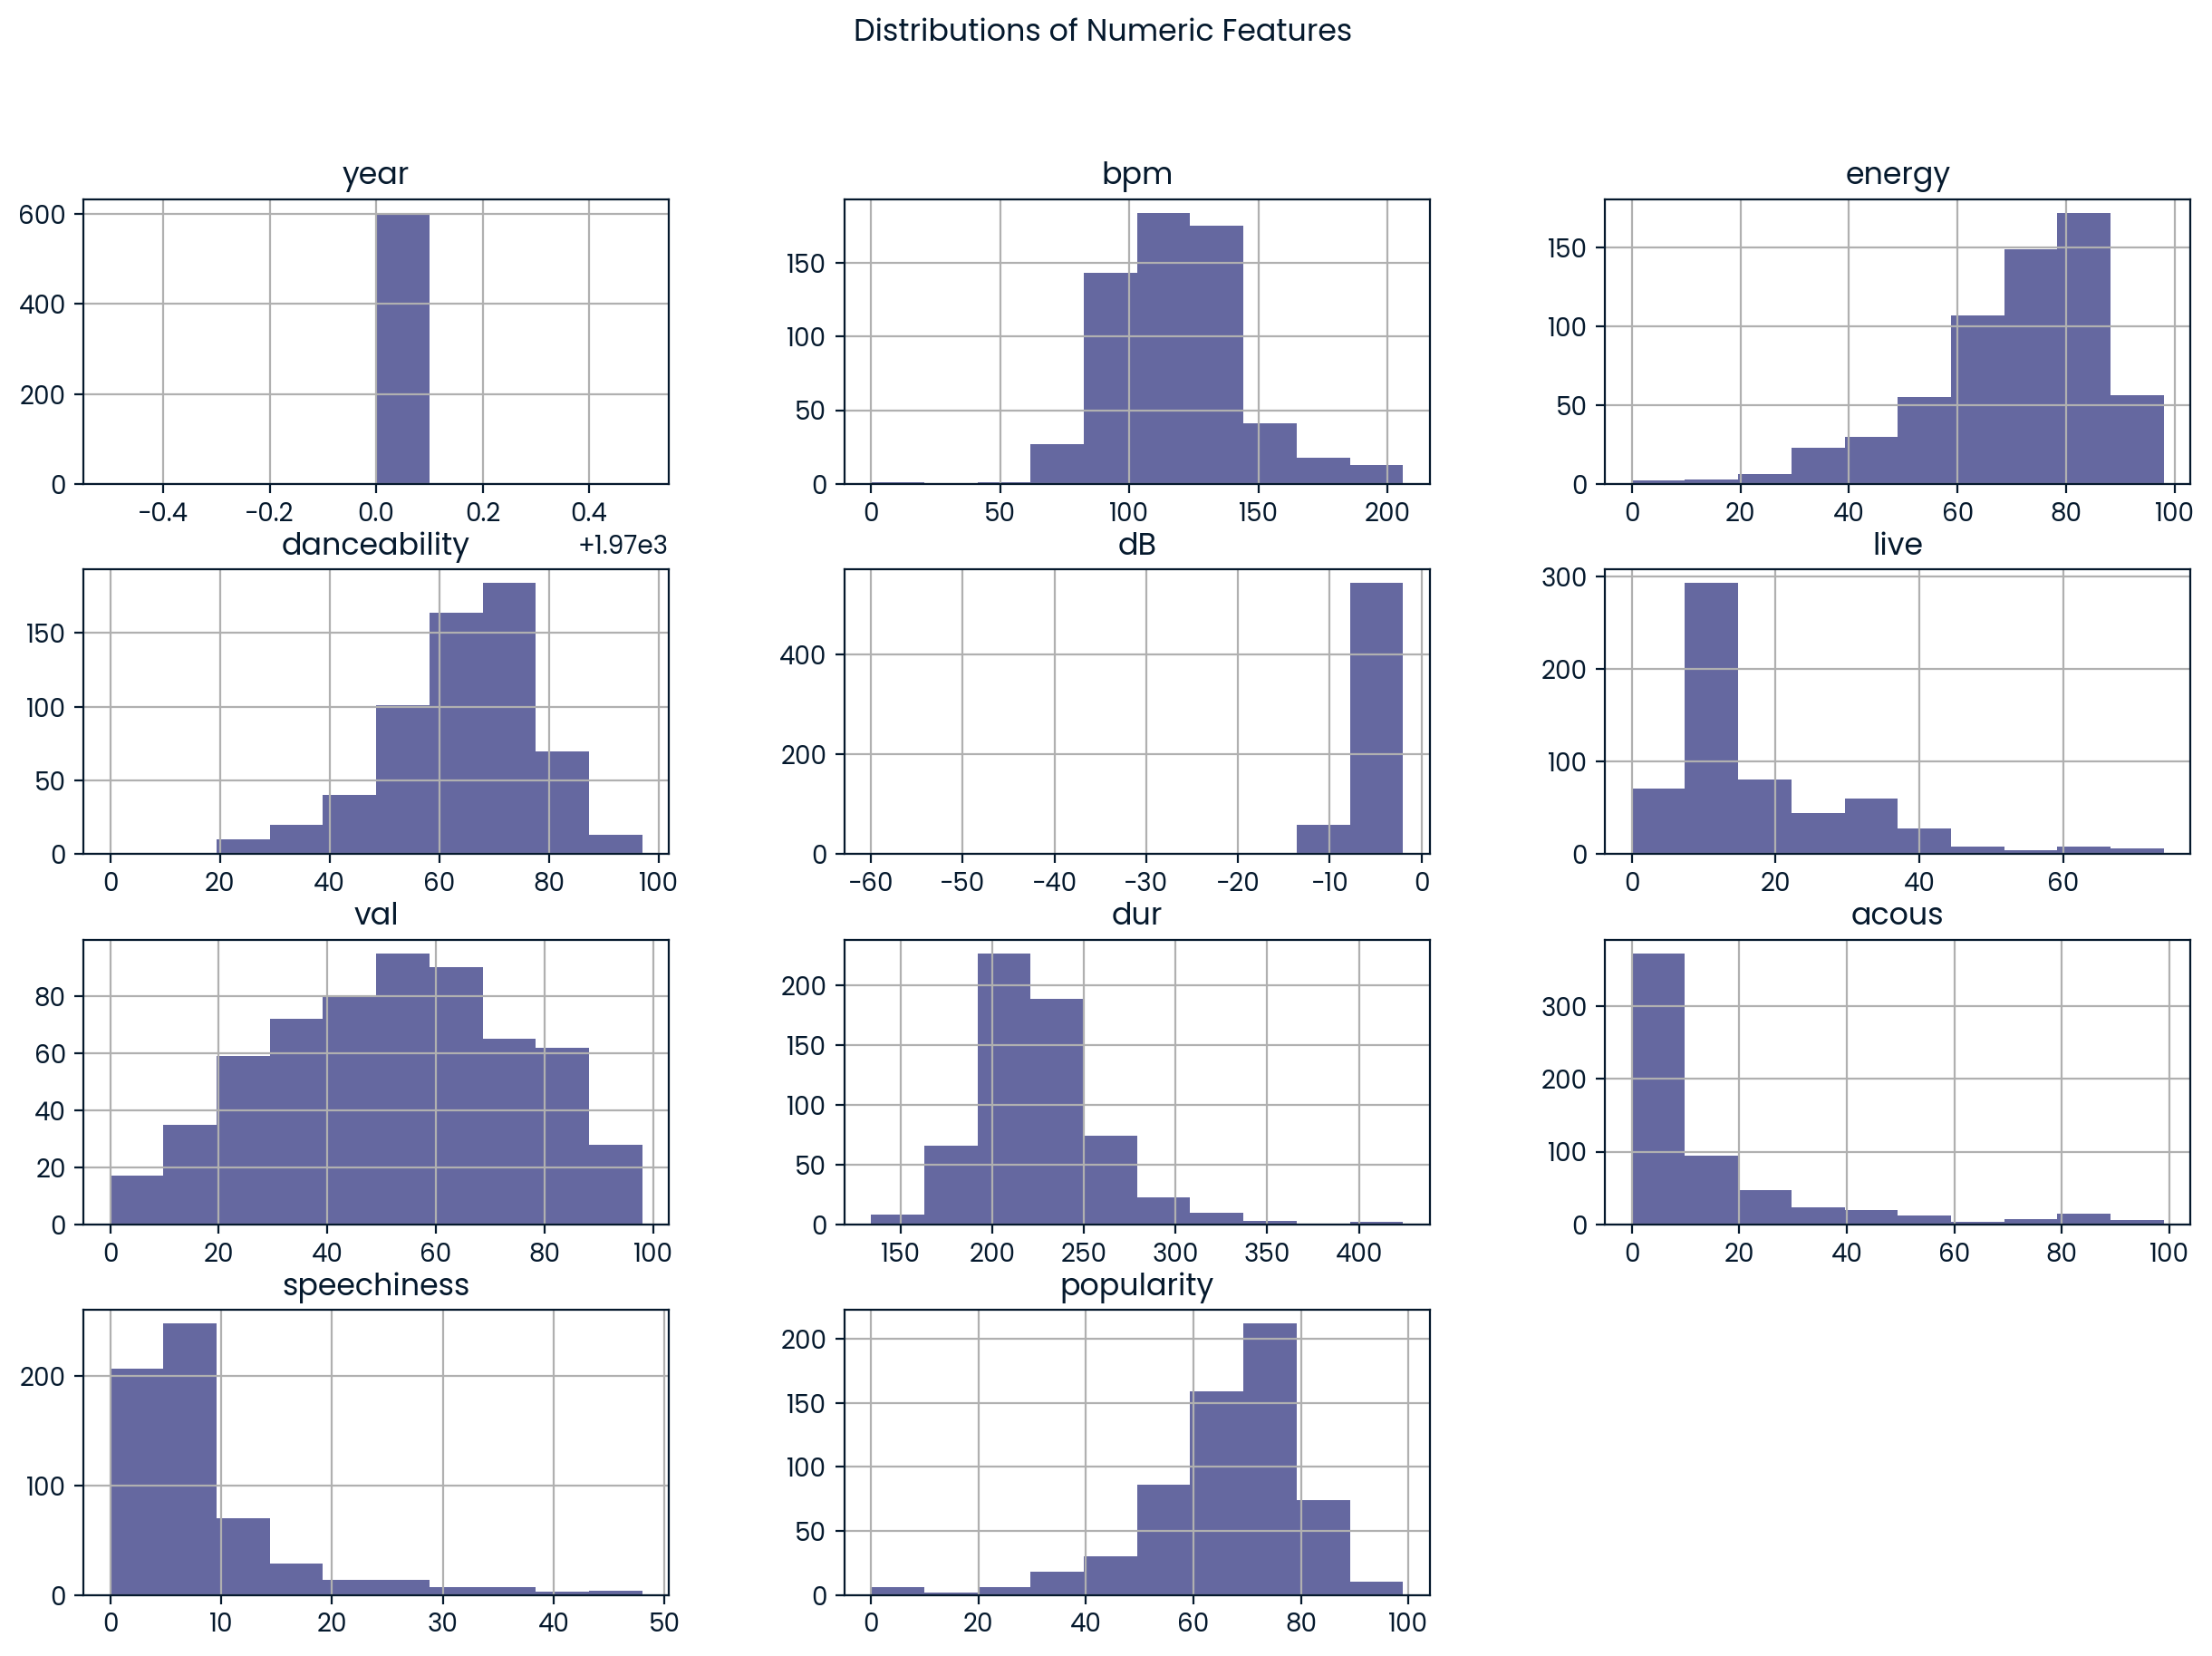

In [80]:
numeric_cols = ['year','bpm','energy','danceability','dB','live','val','dur','acous','speechiness','popularity']
spotify[numeric_cols].hist(figsize=(15,10))
plt.suptitle("Distributions of Numeric Features")
plt.show()

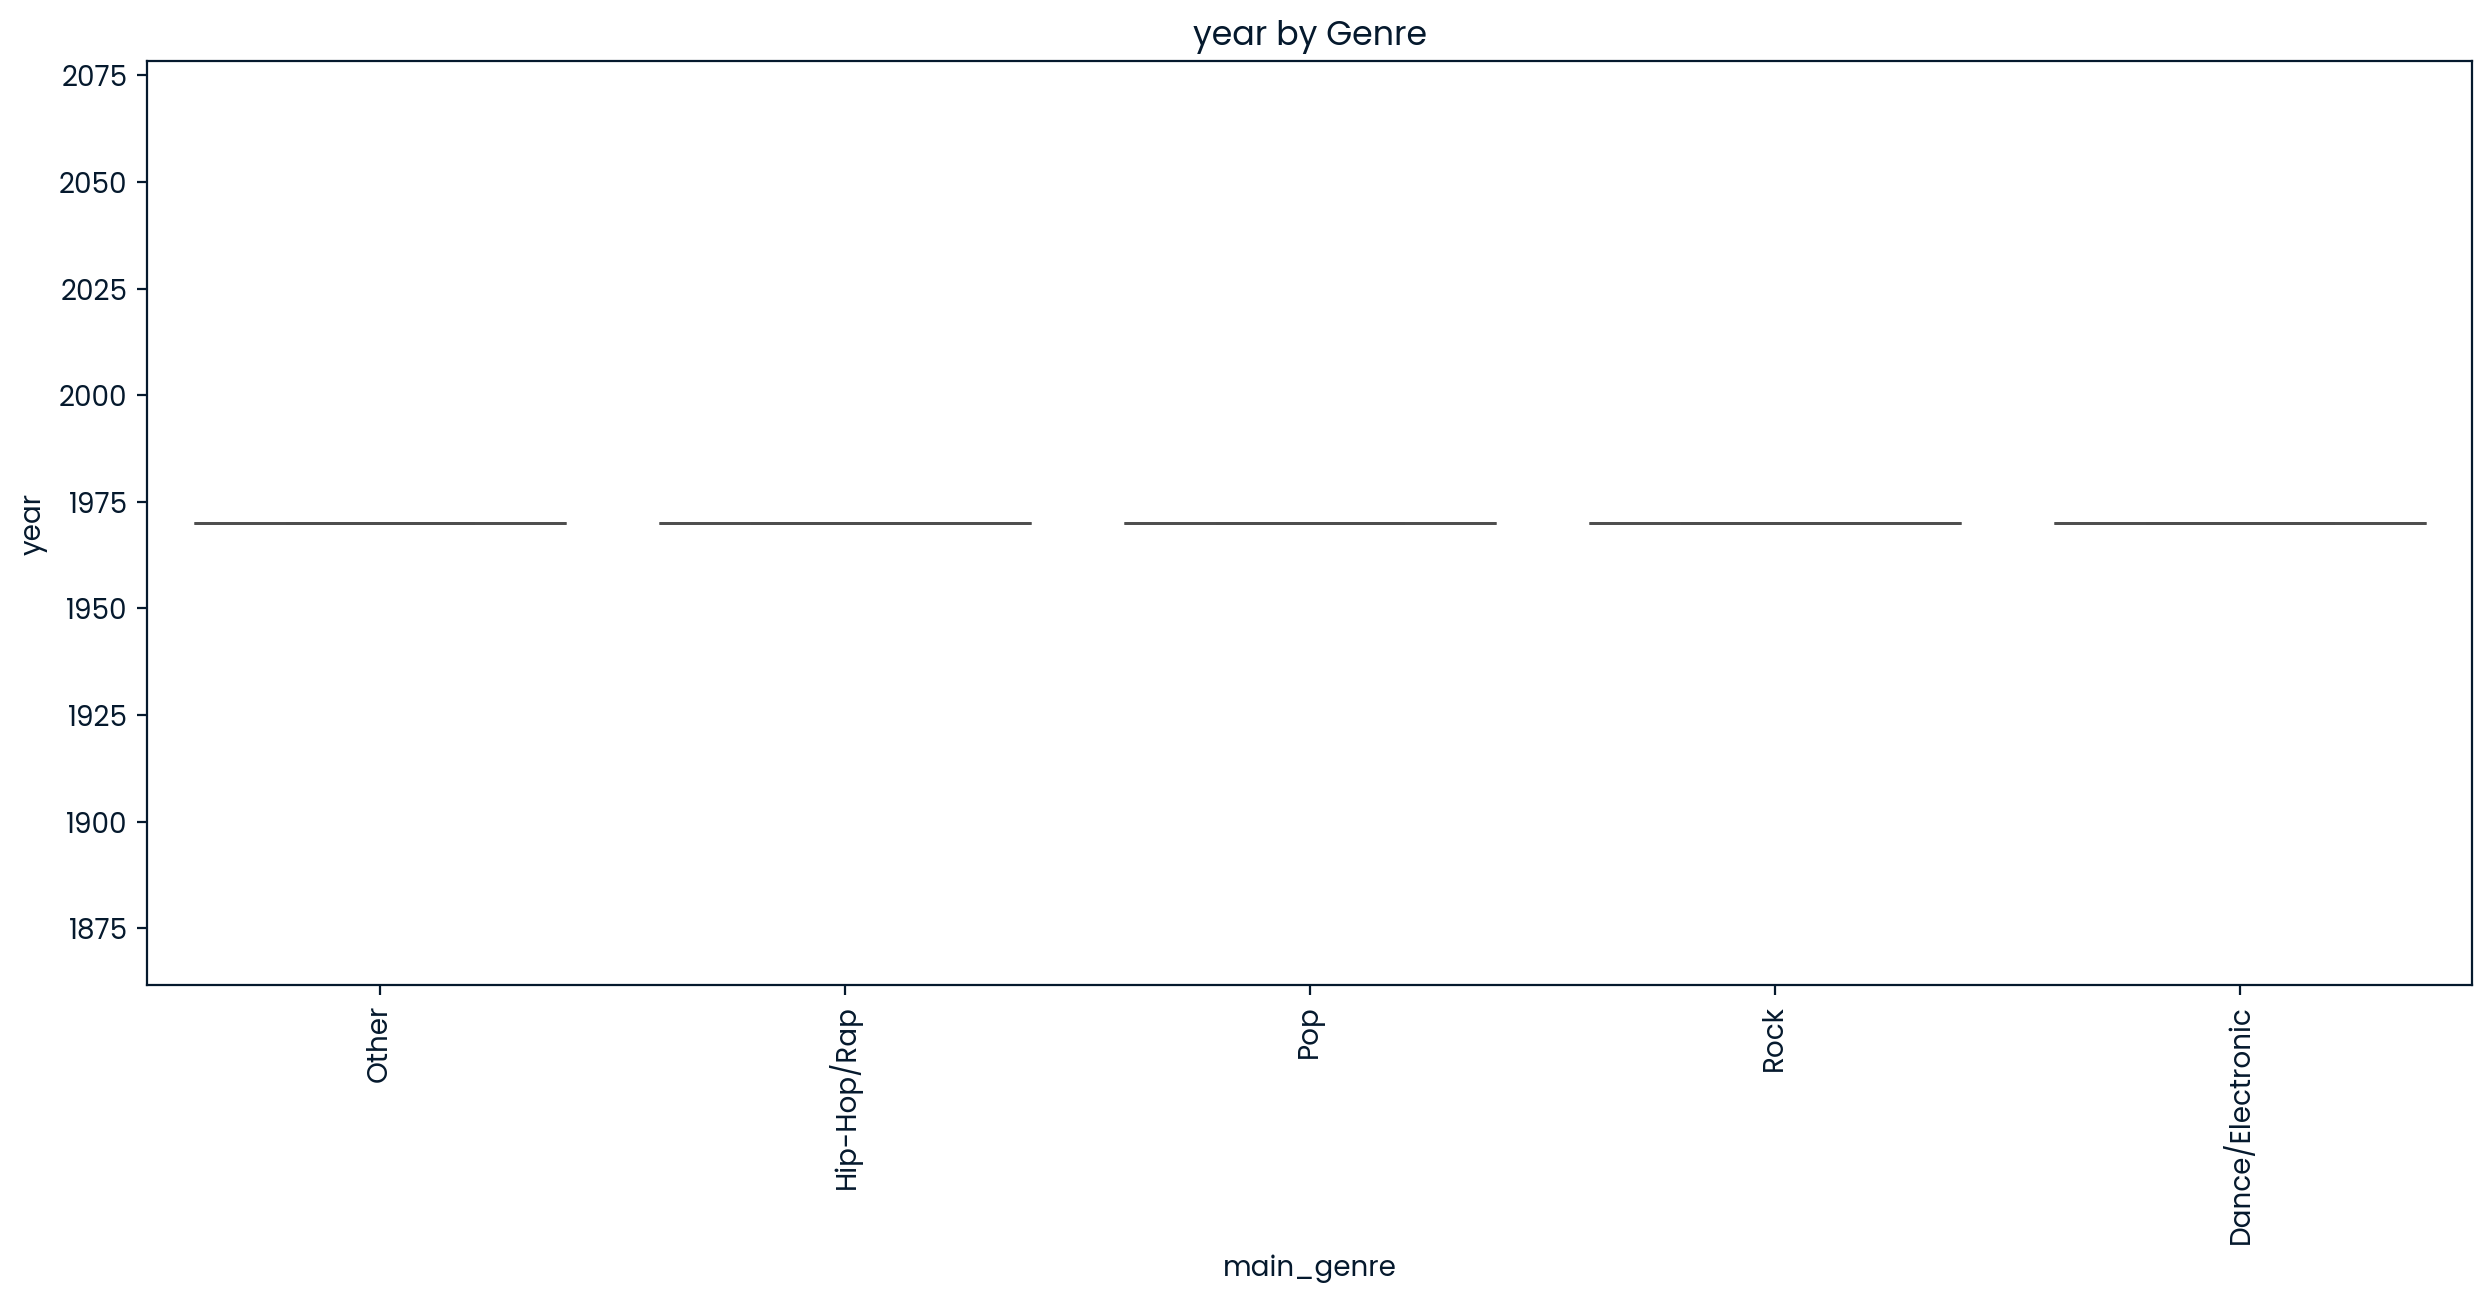

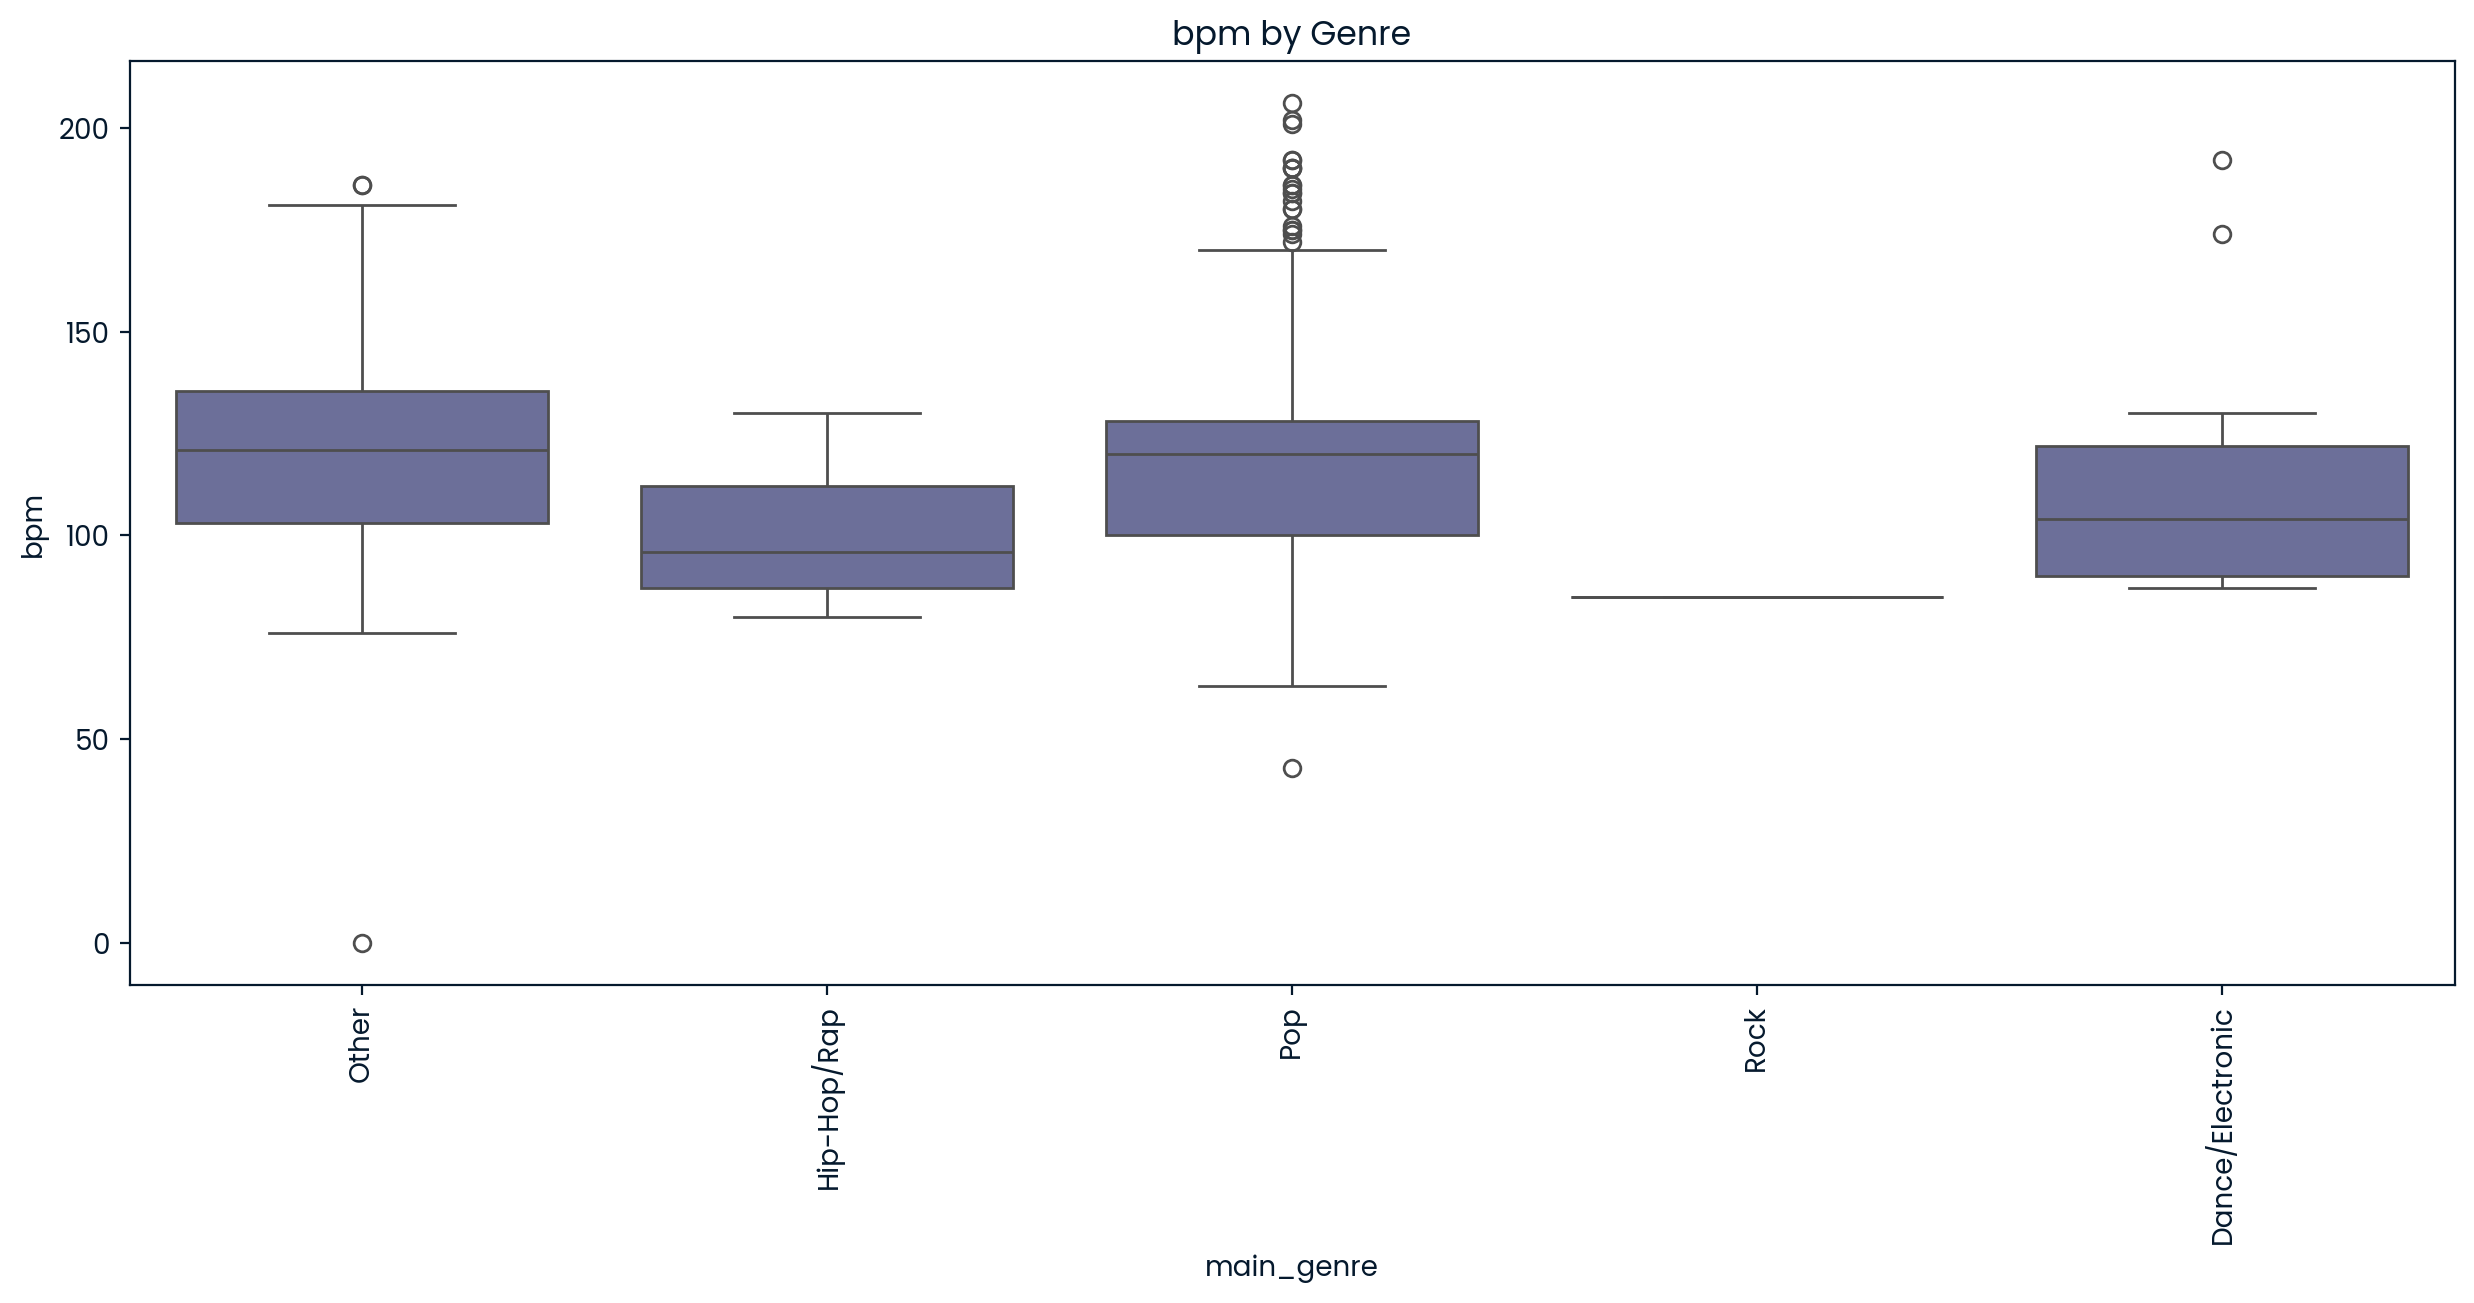

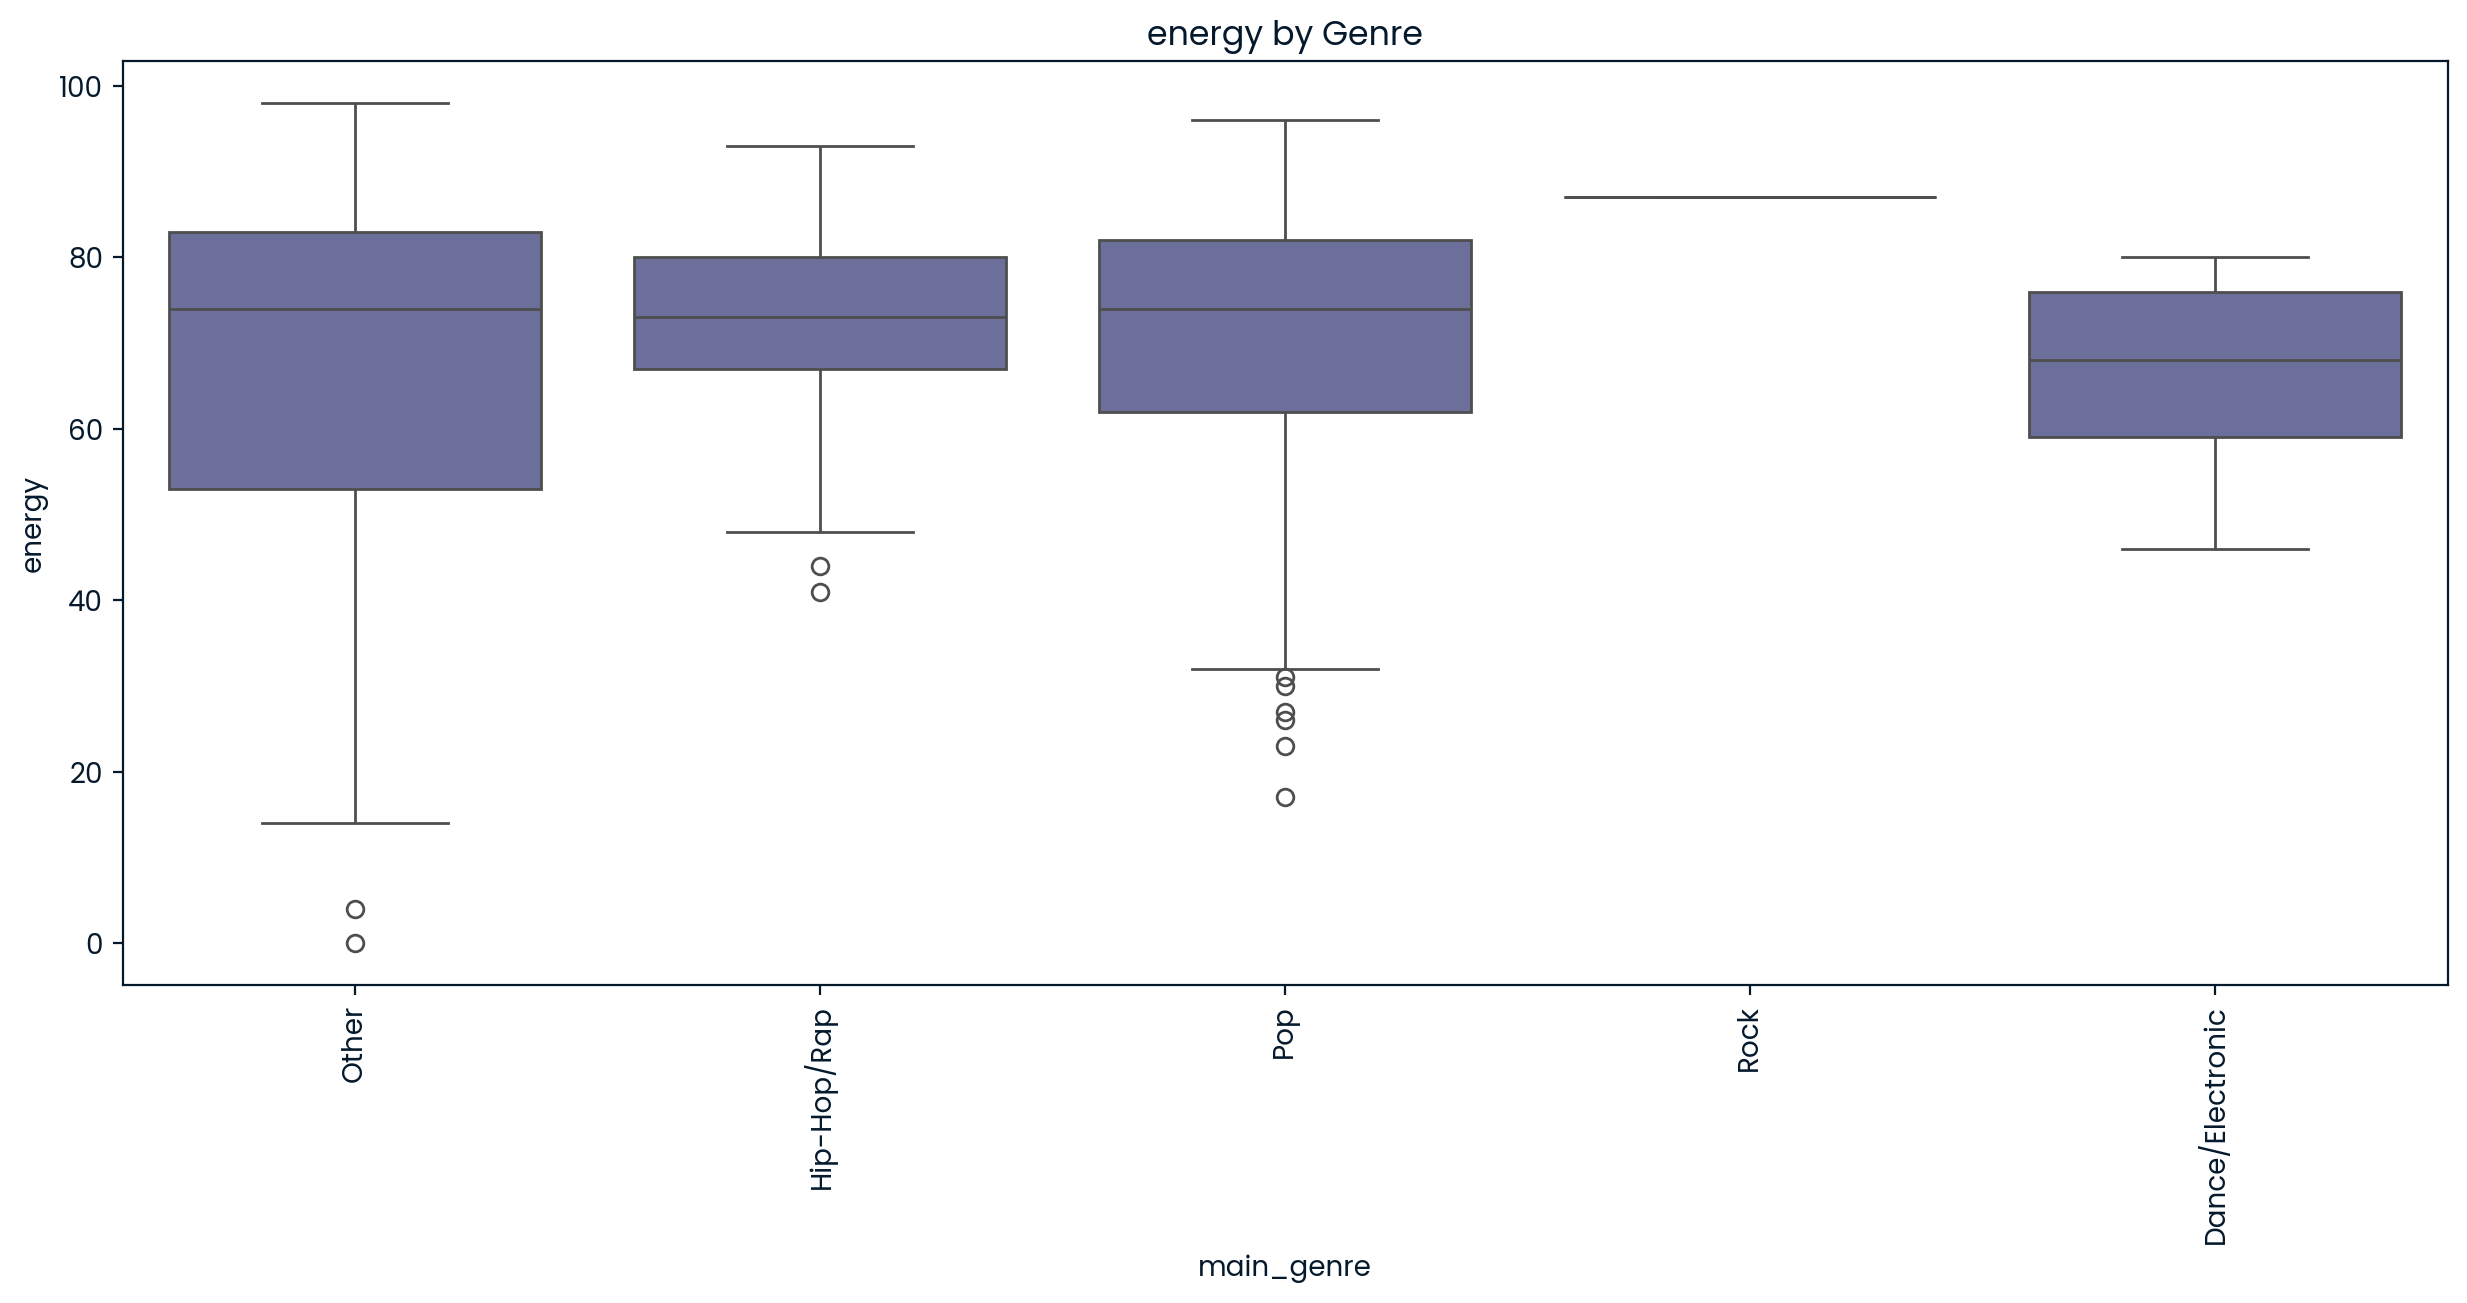

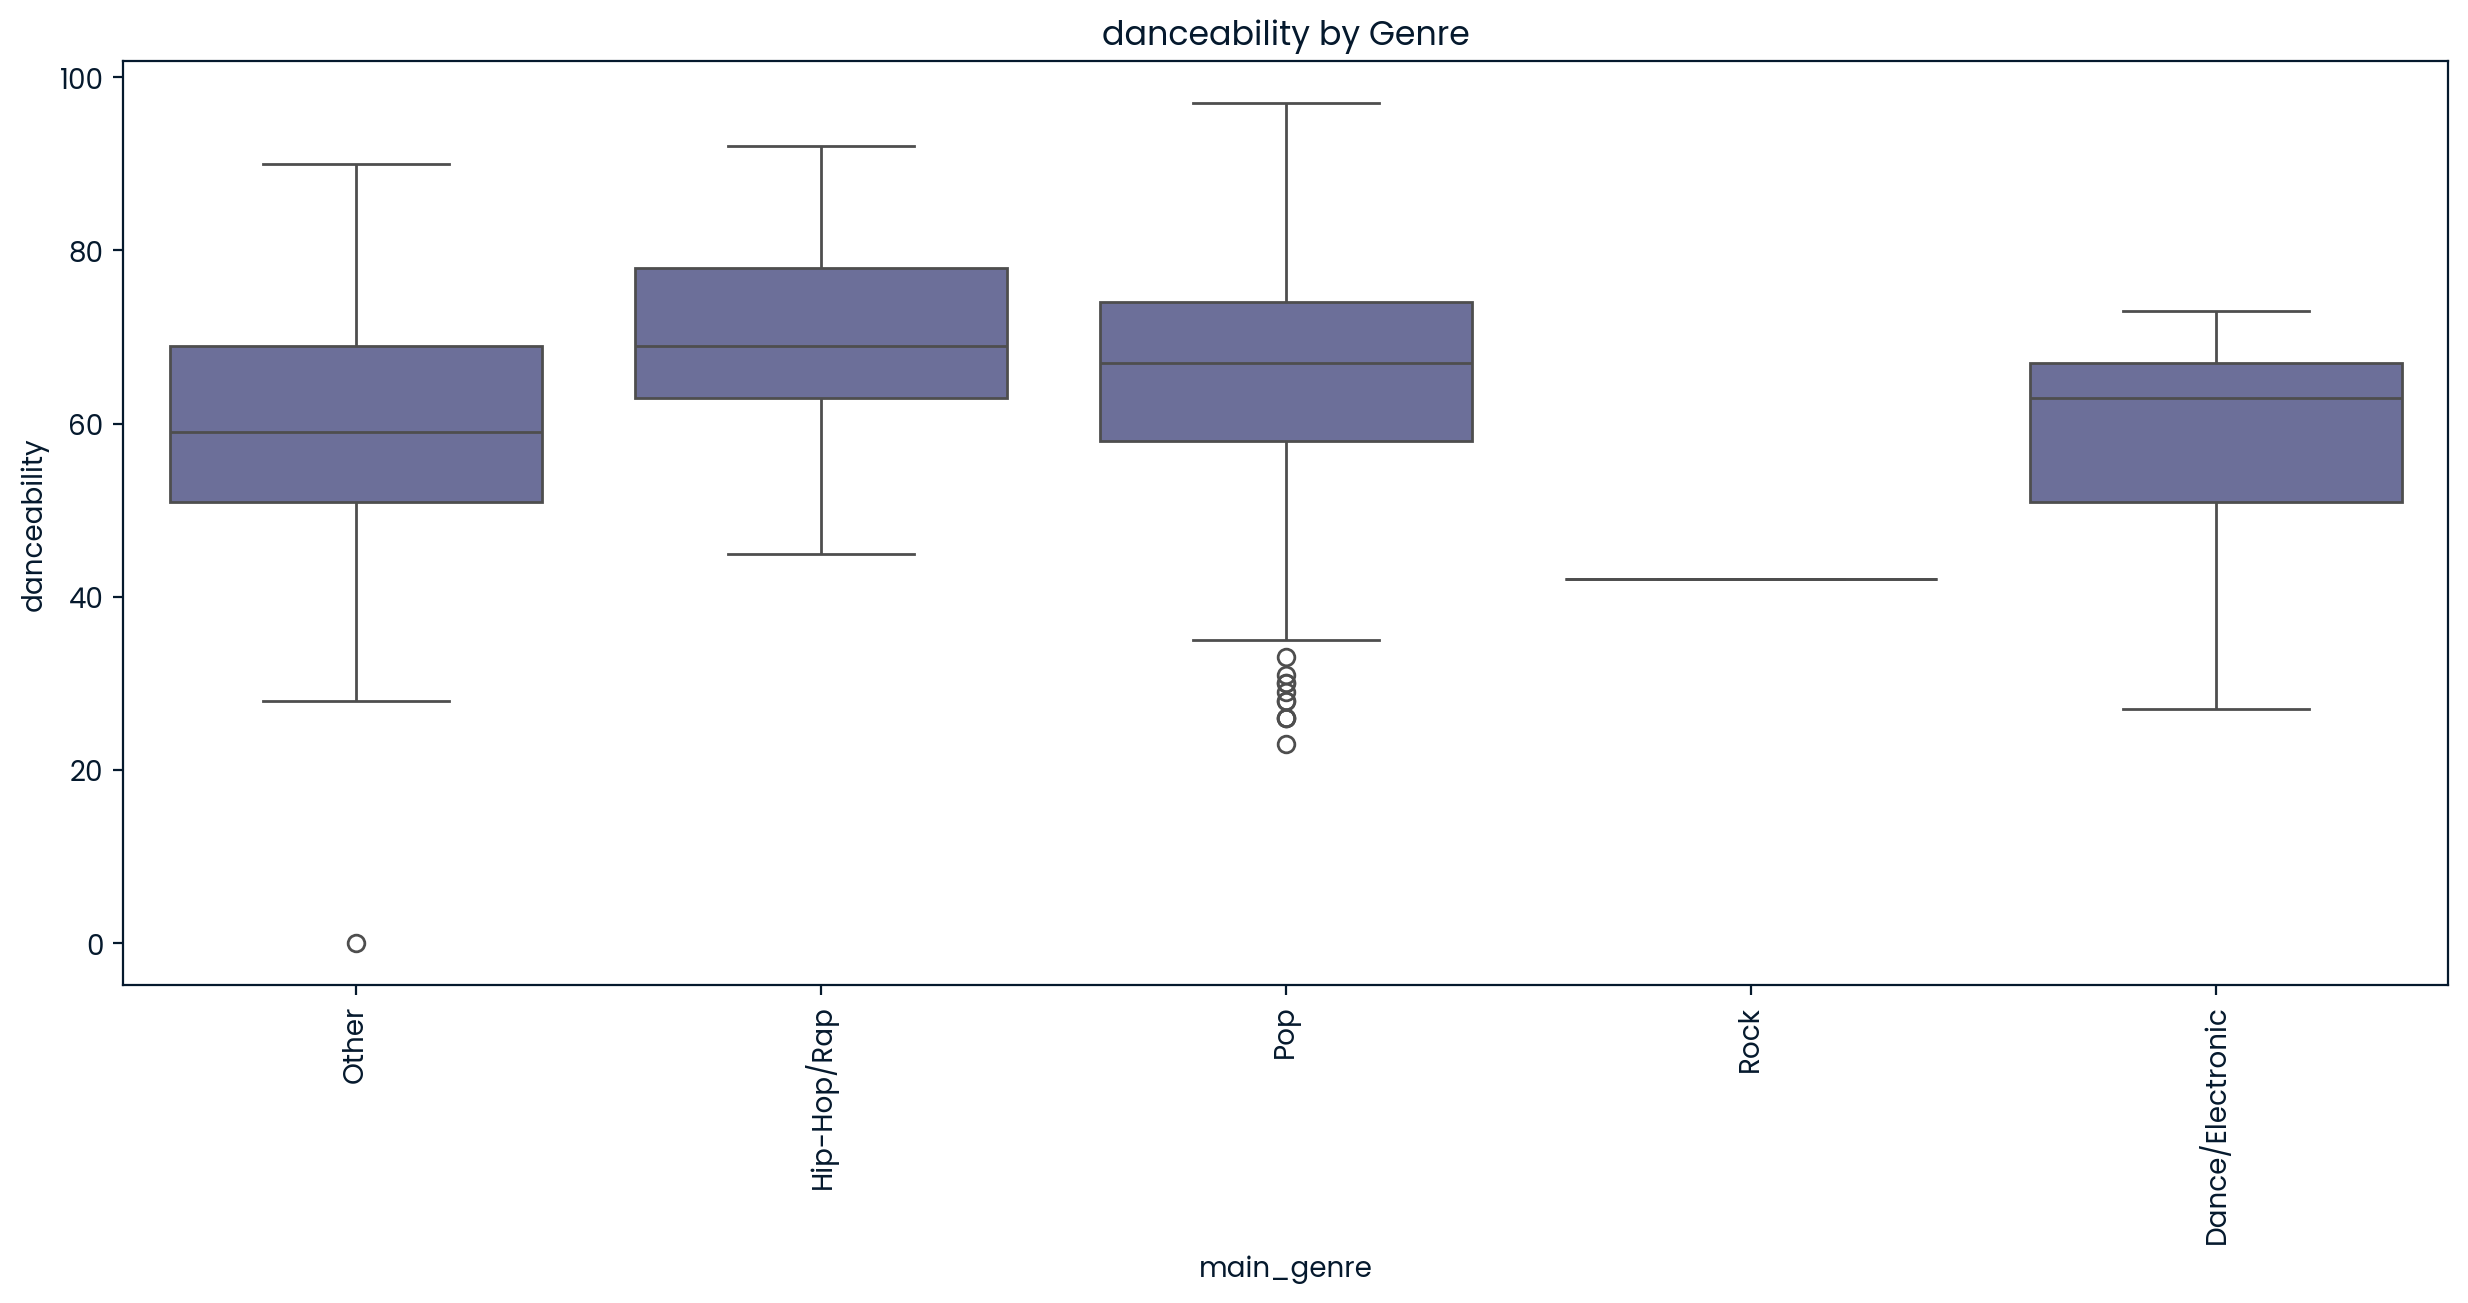

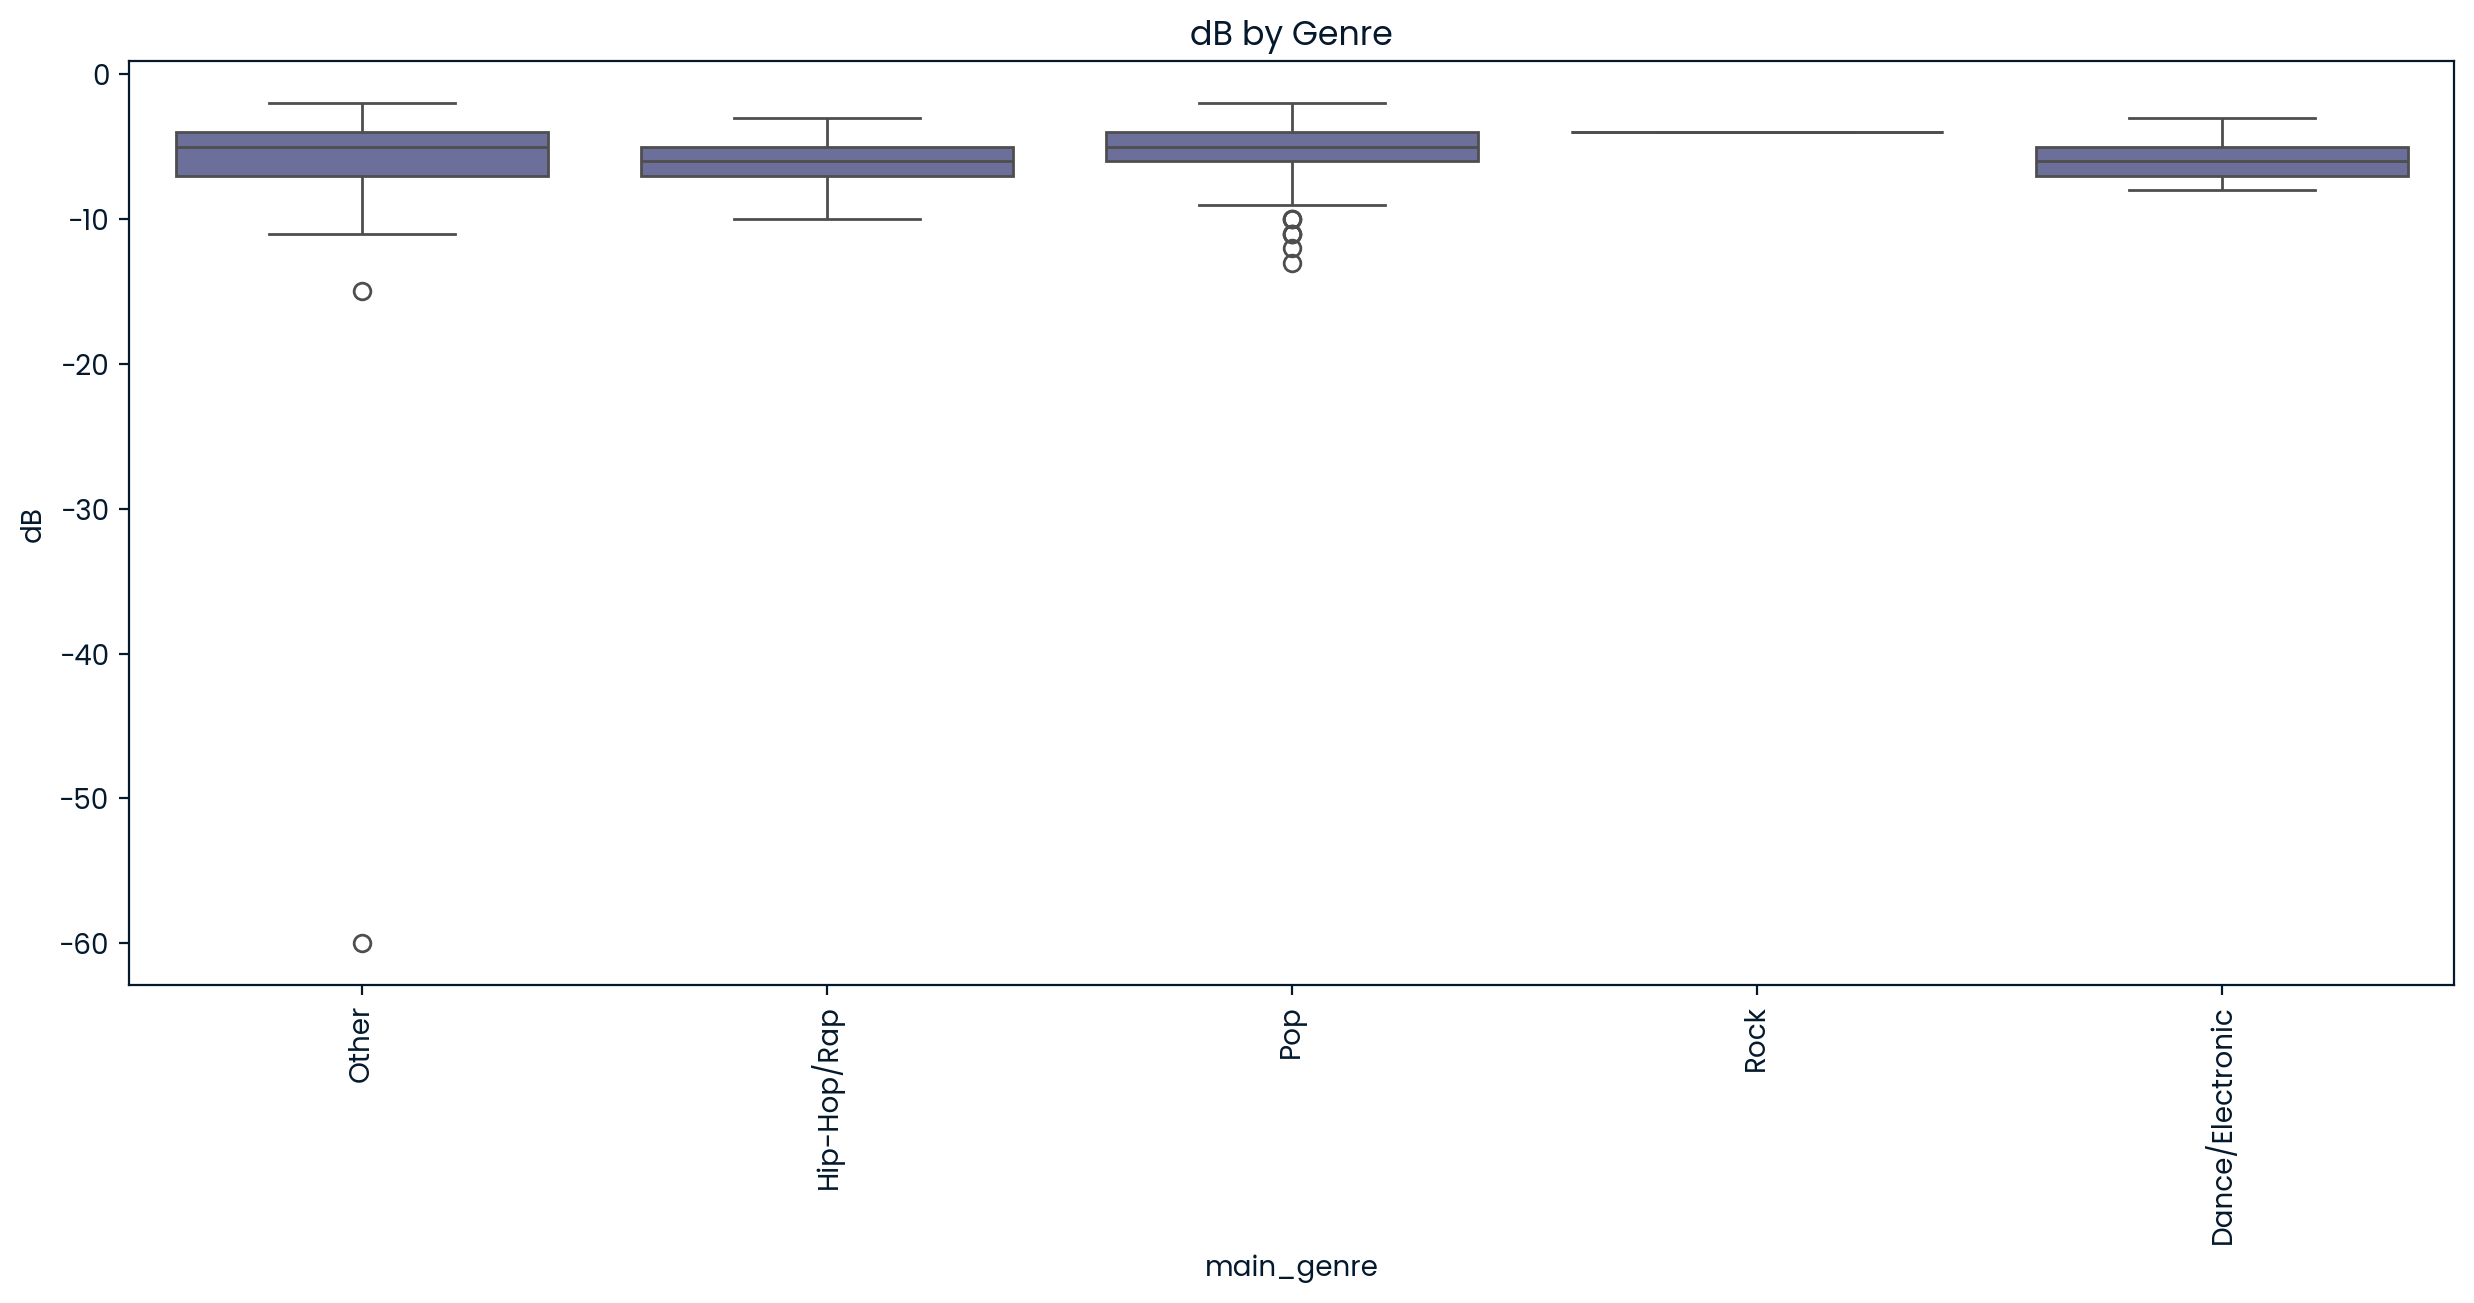

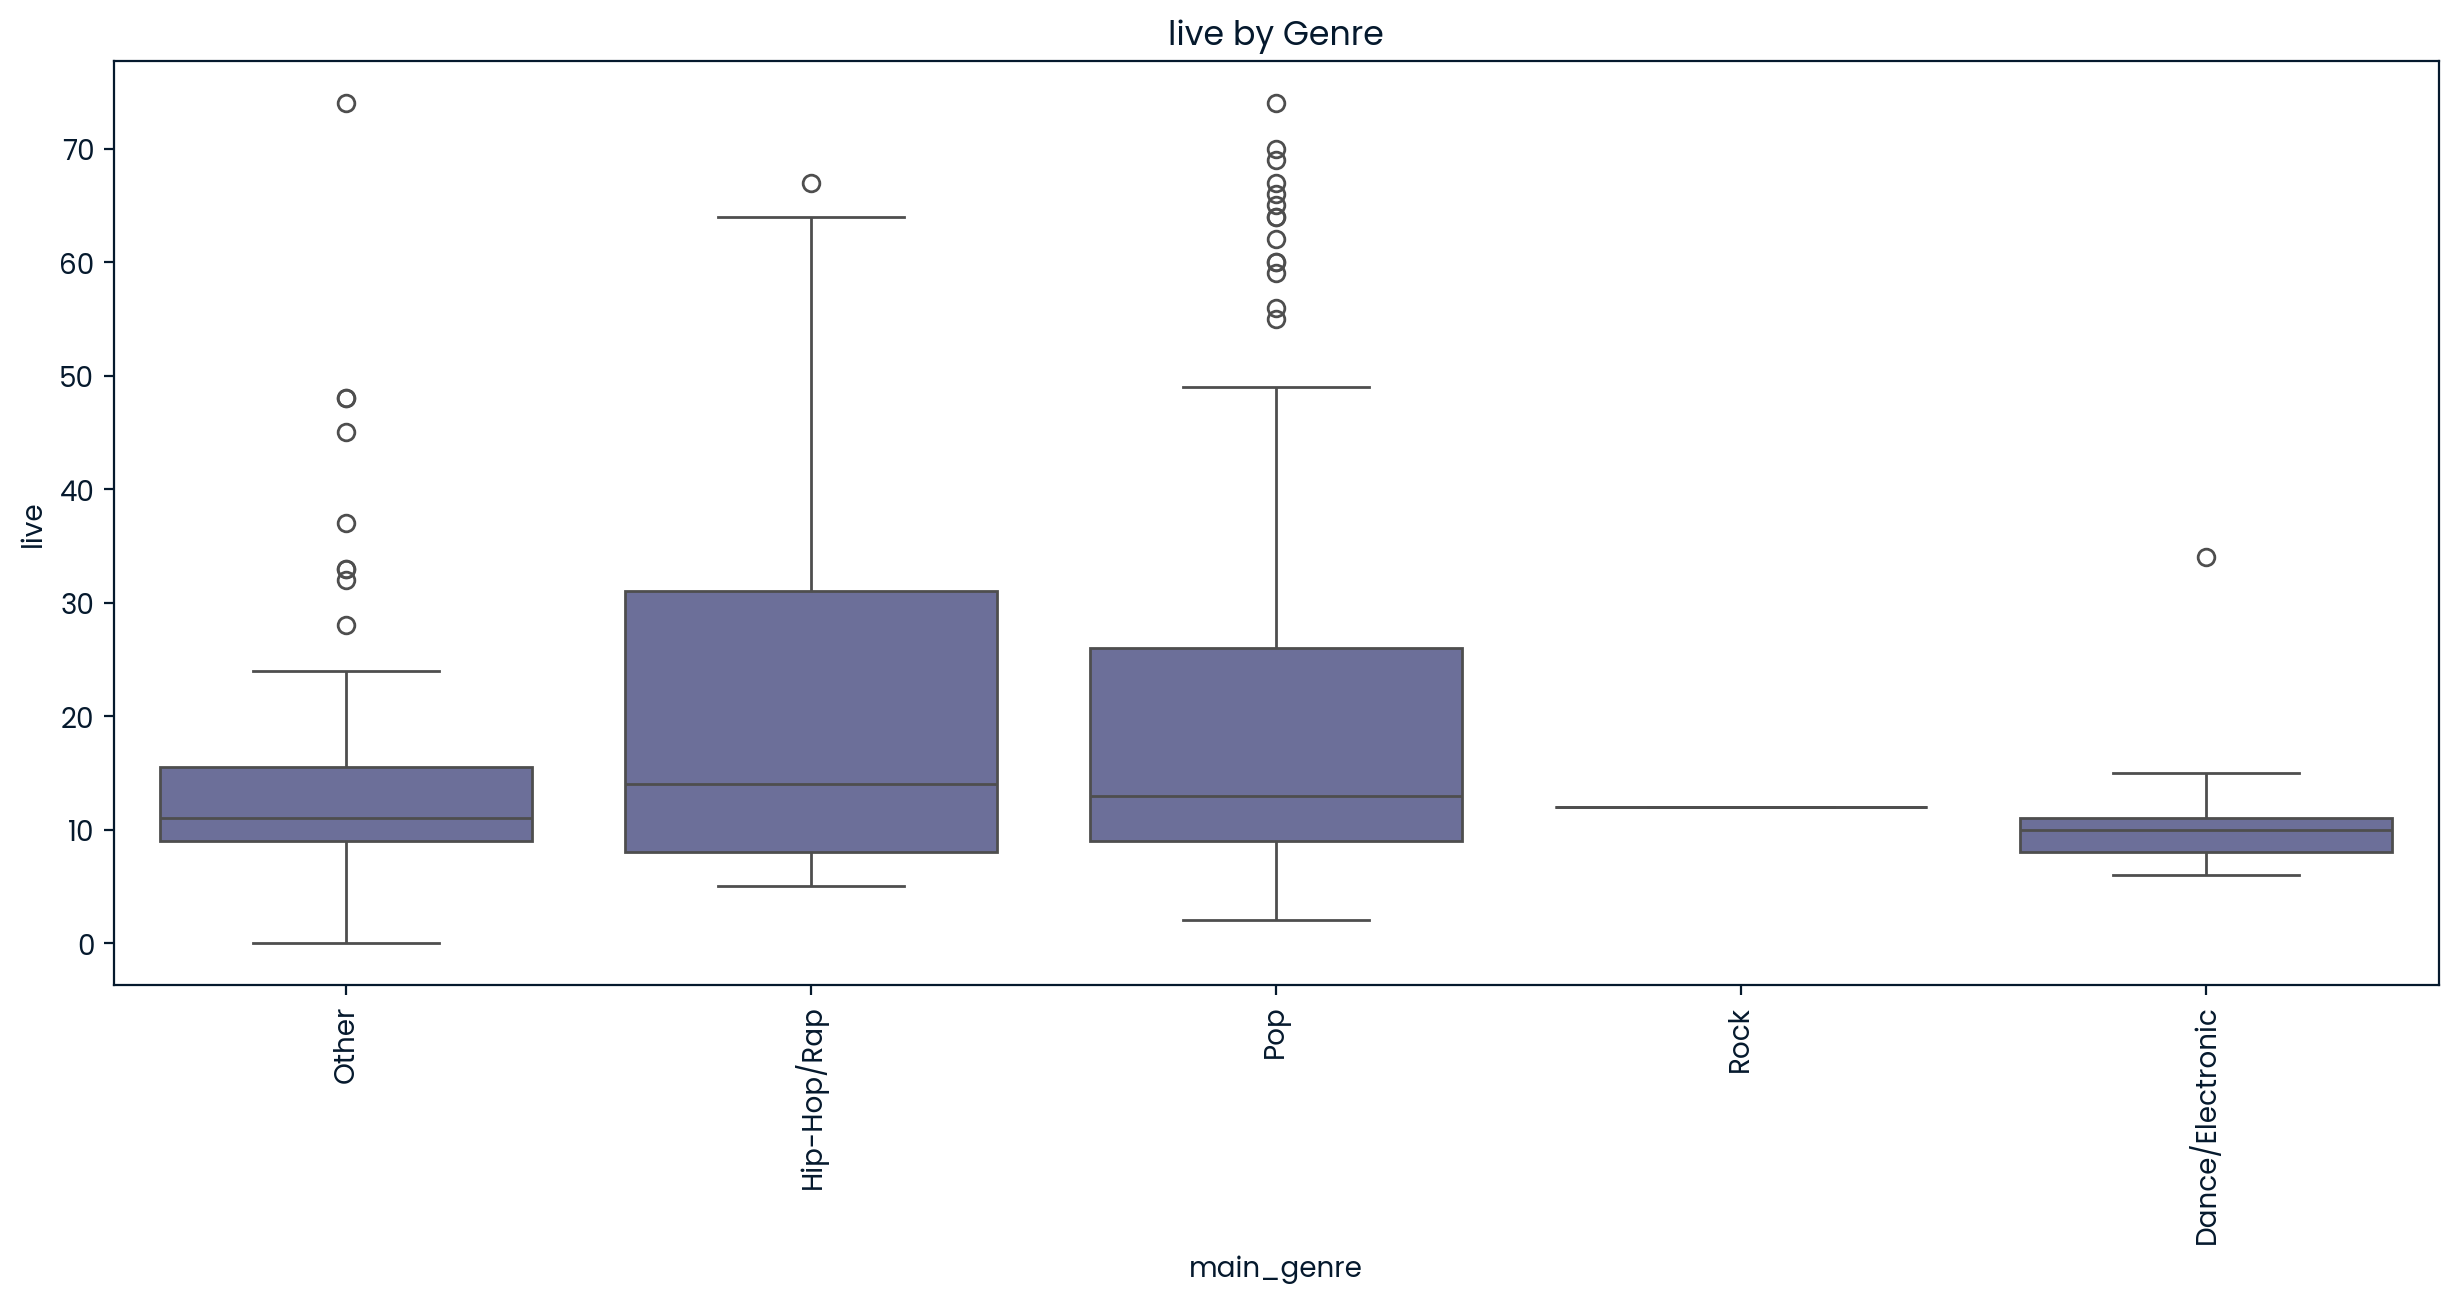

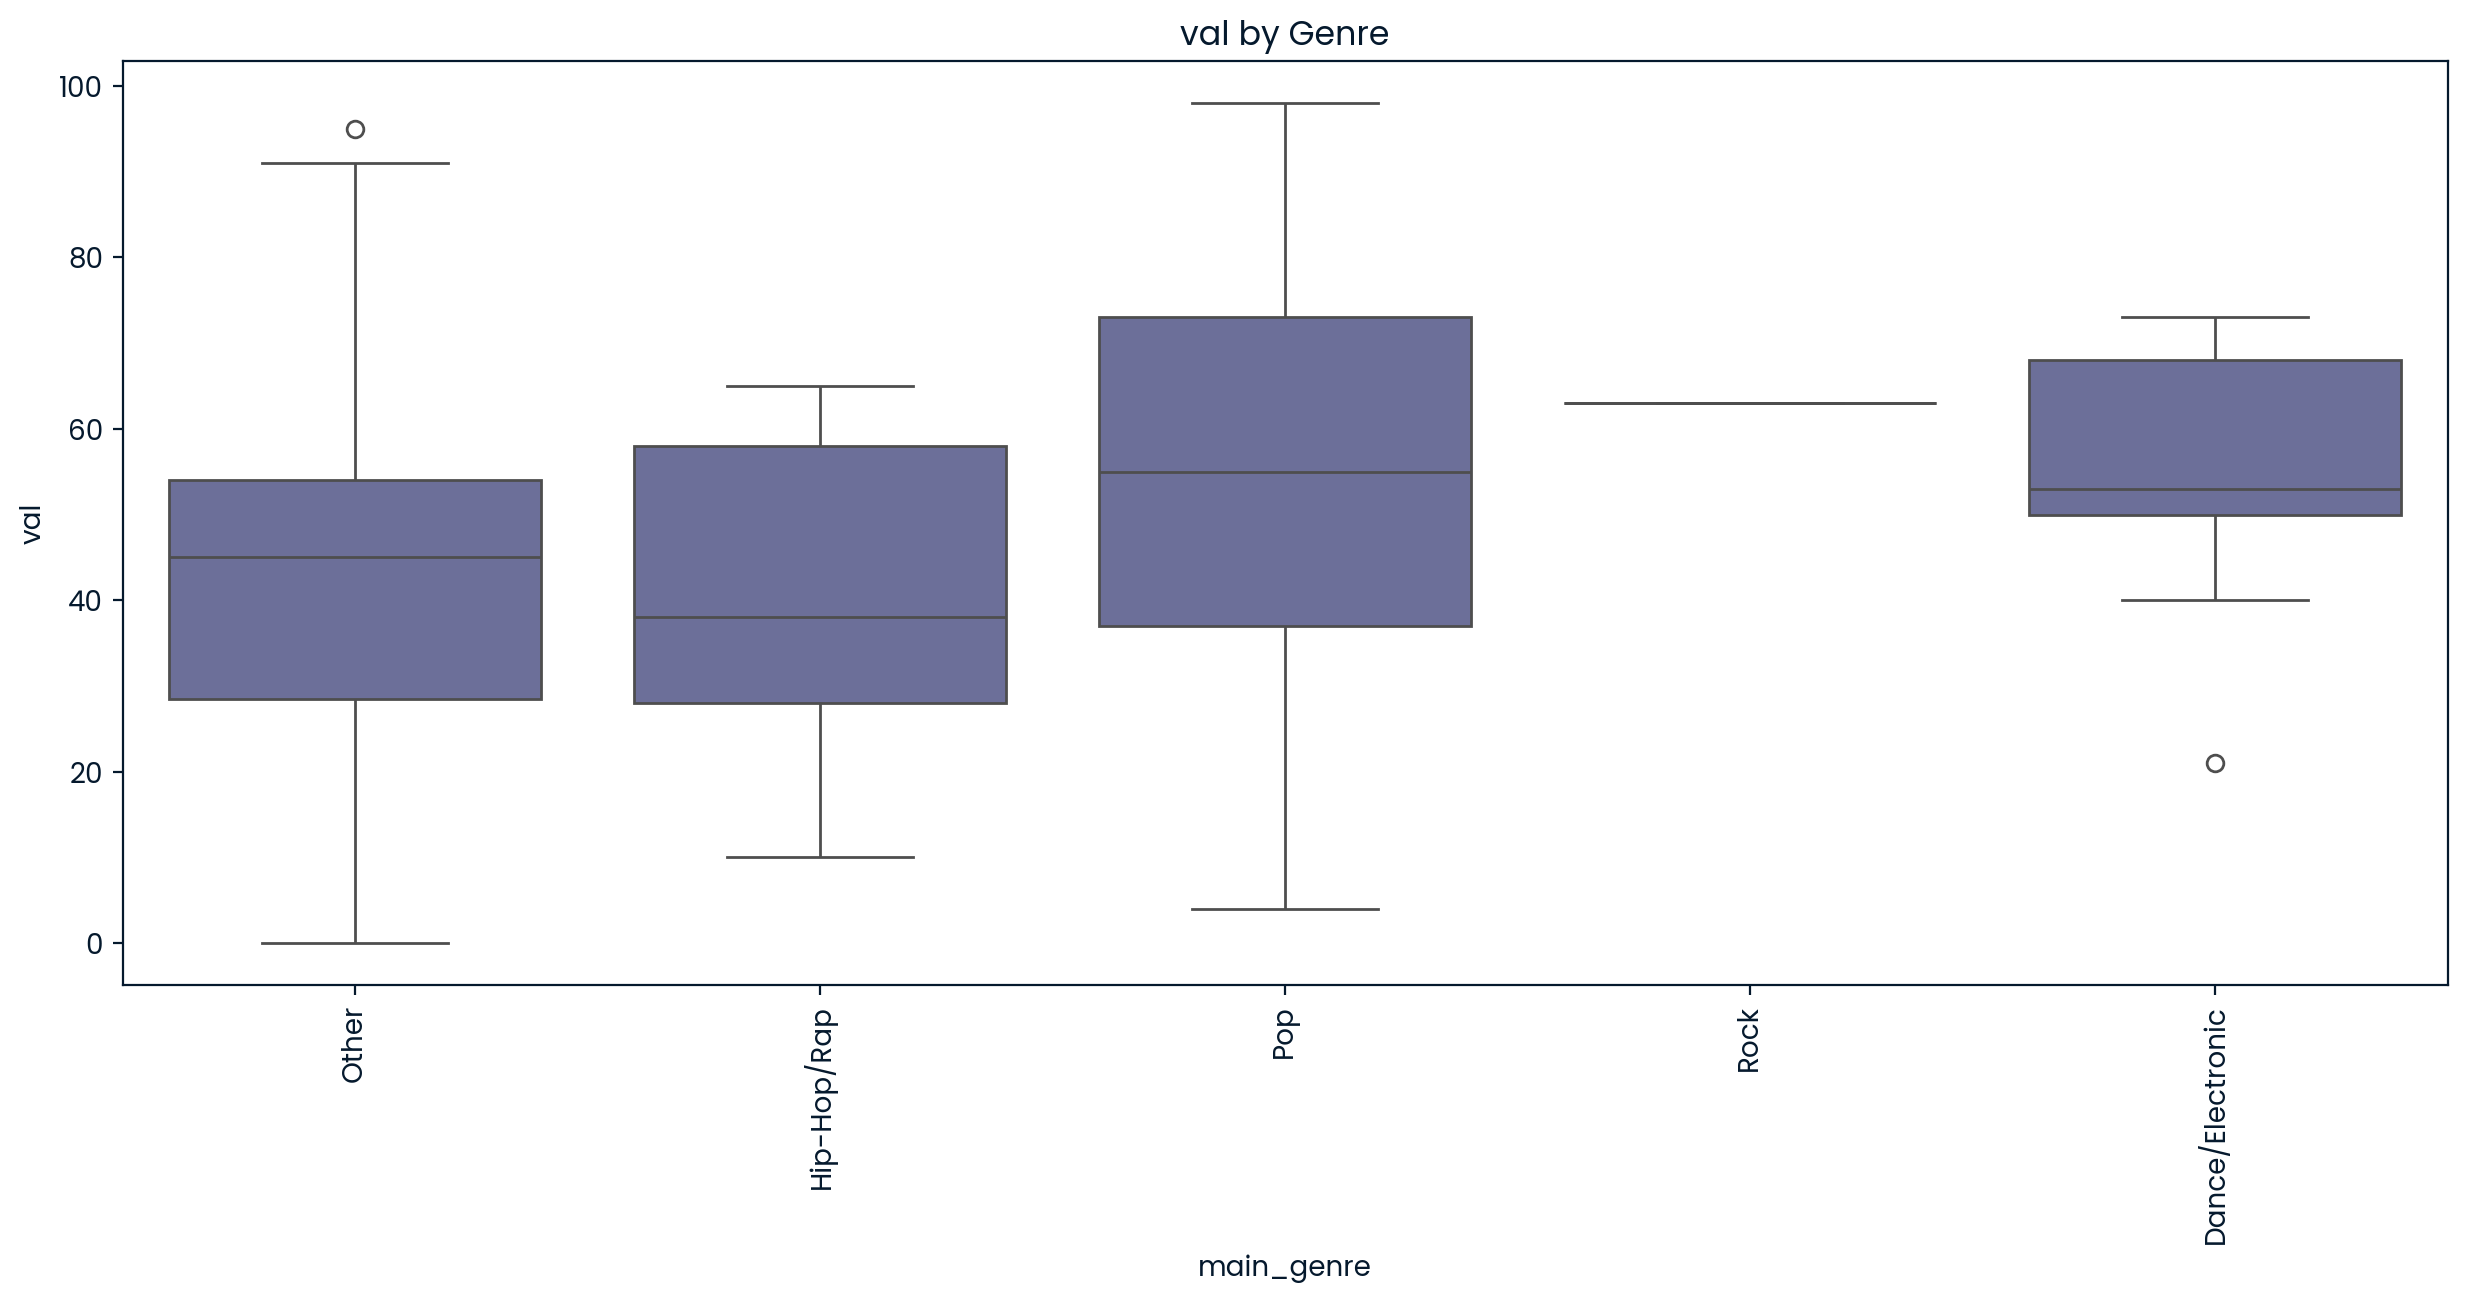

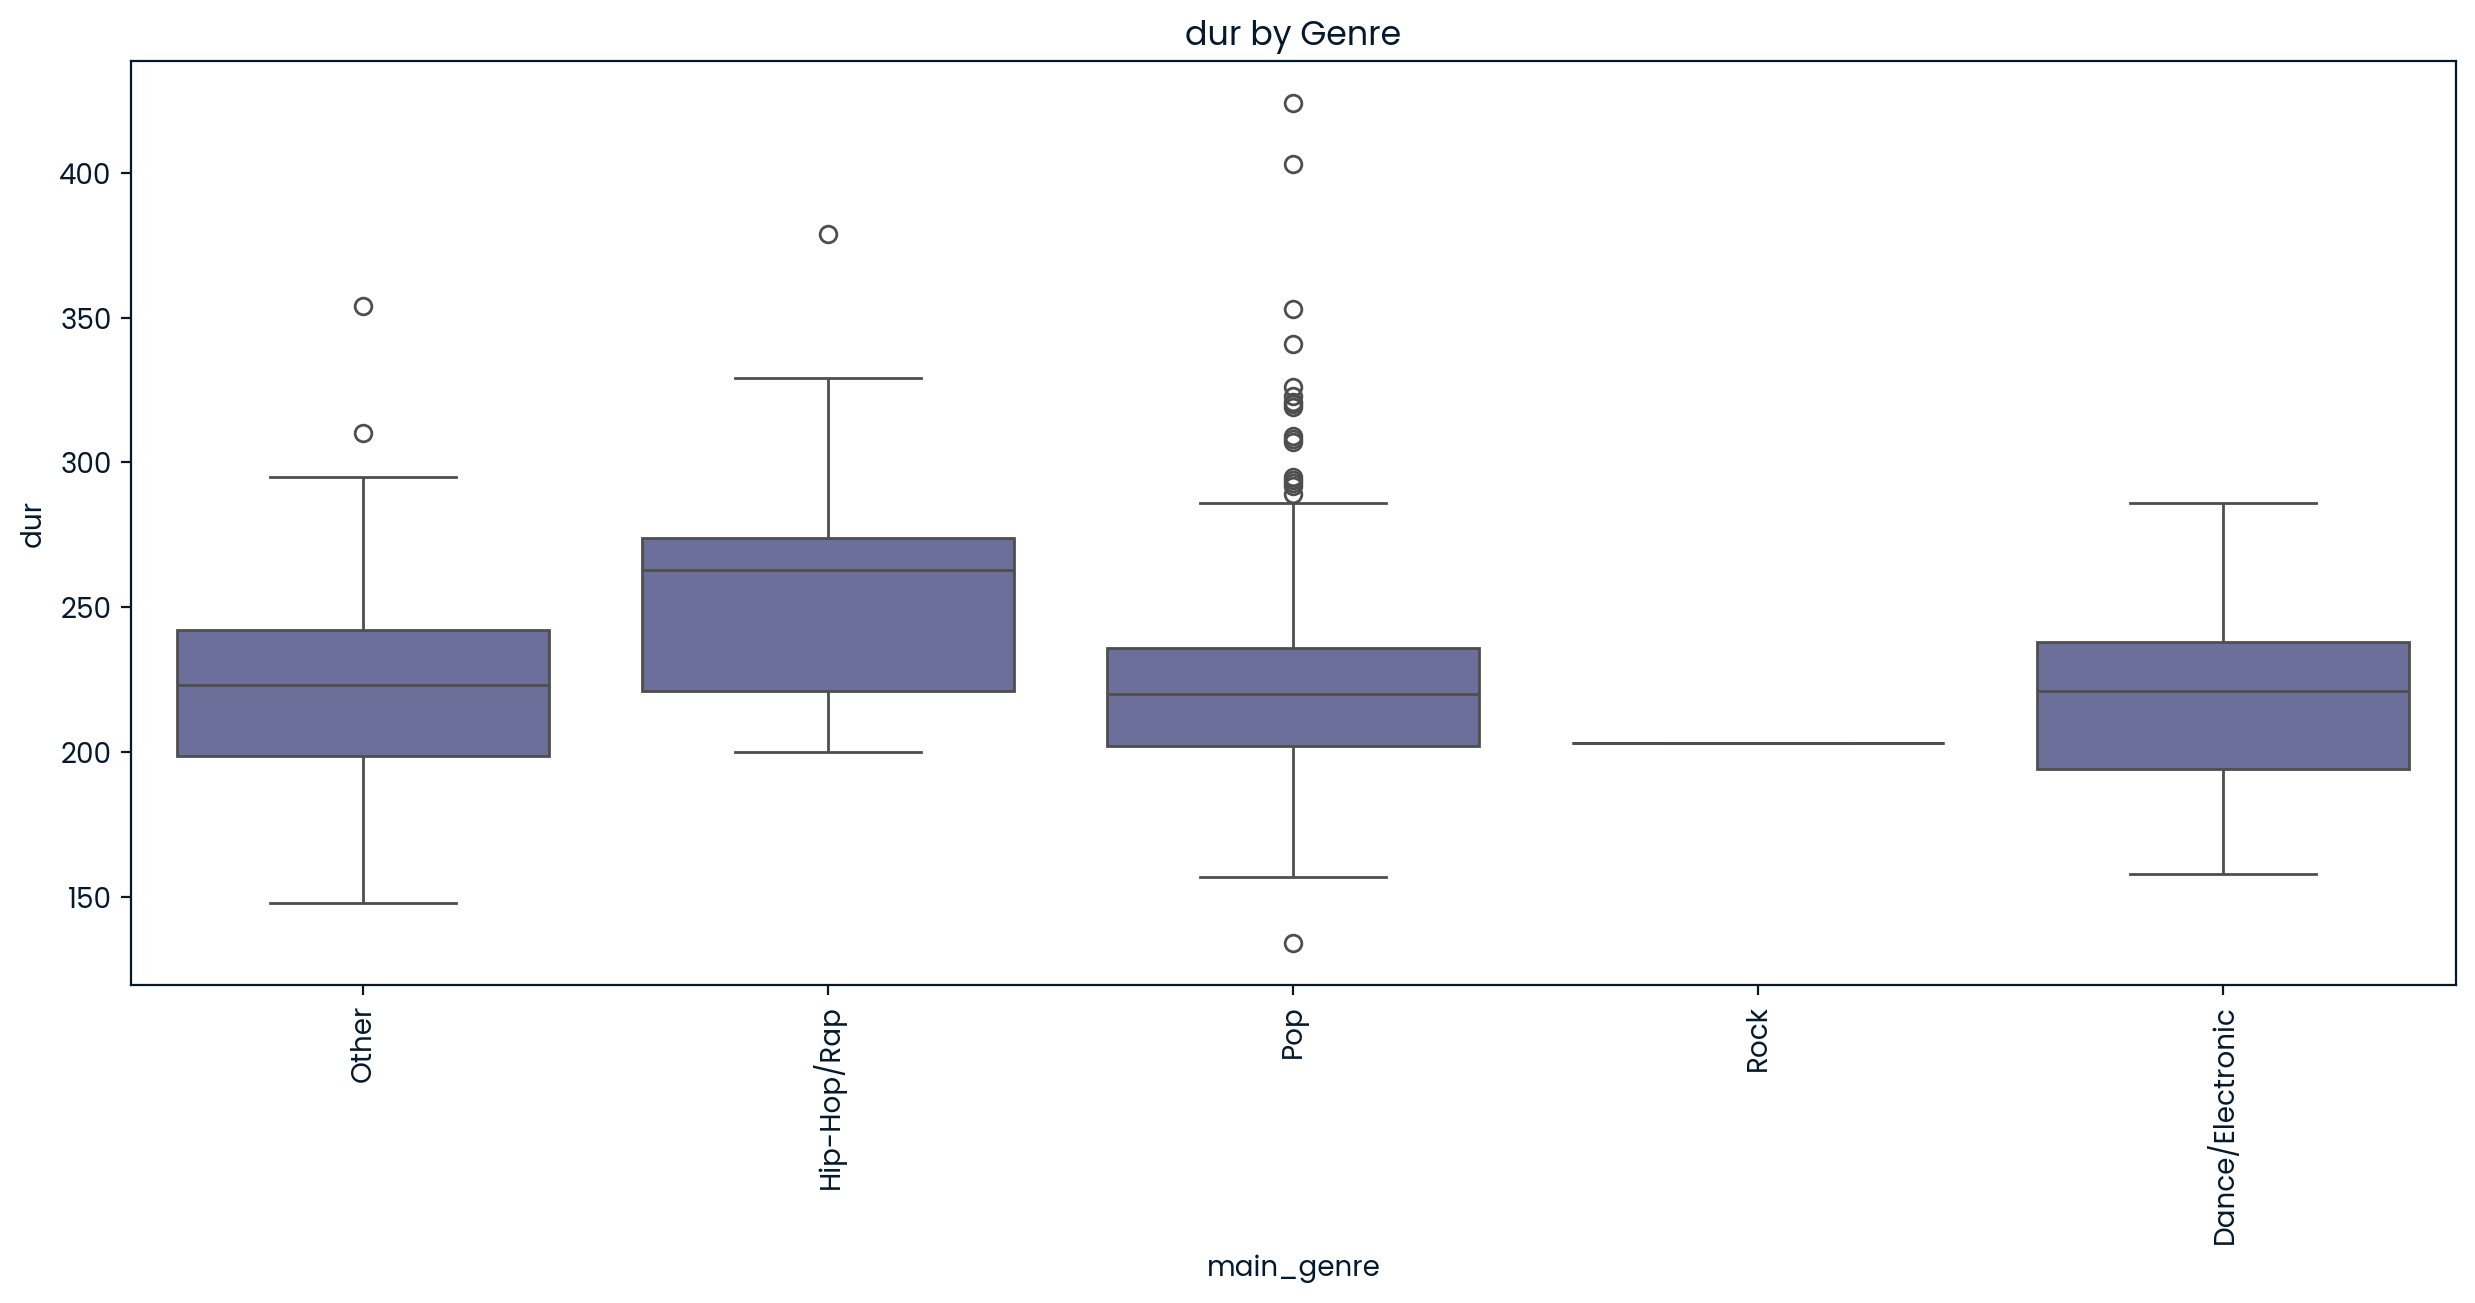

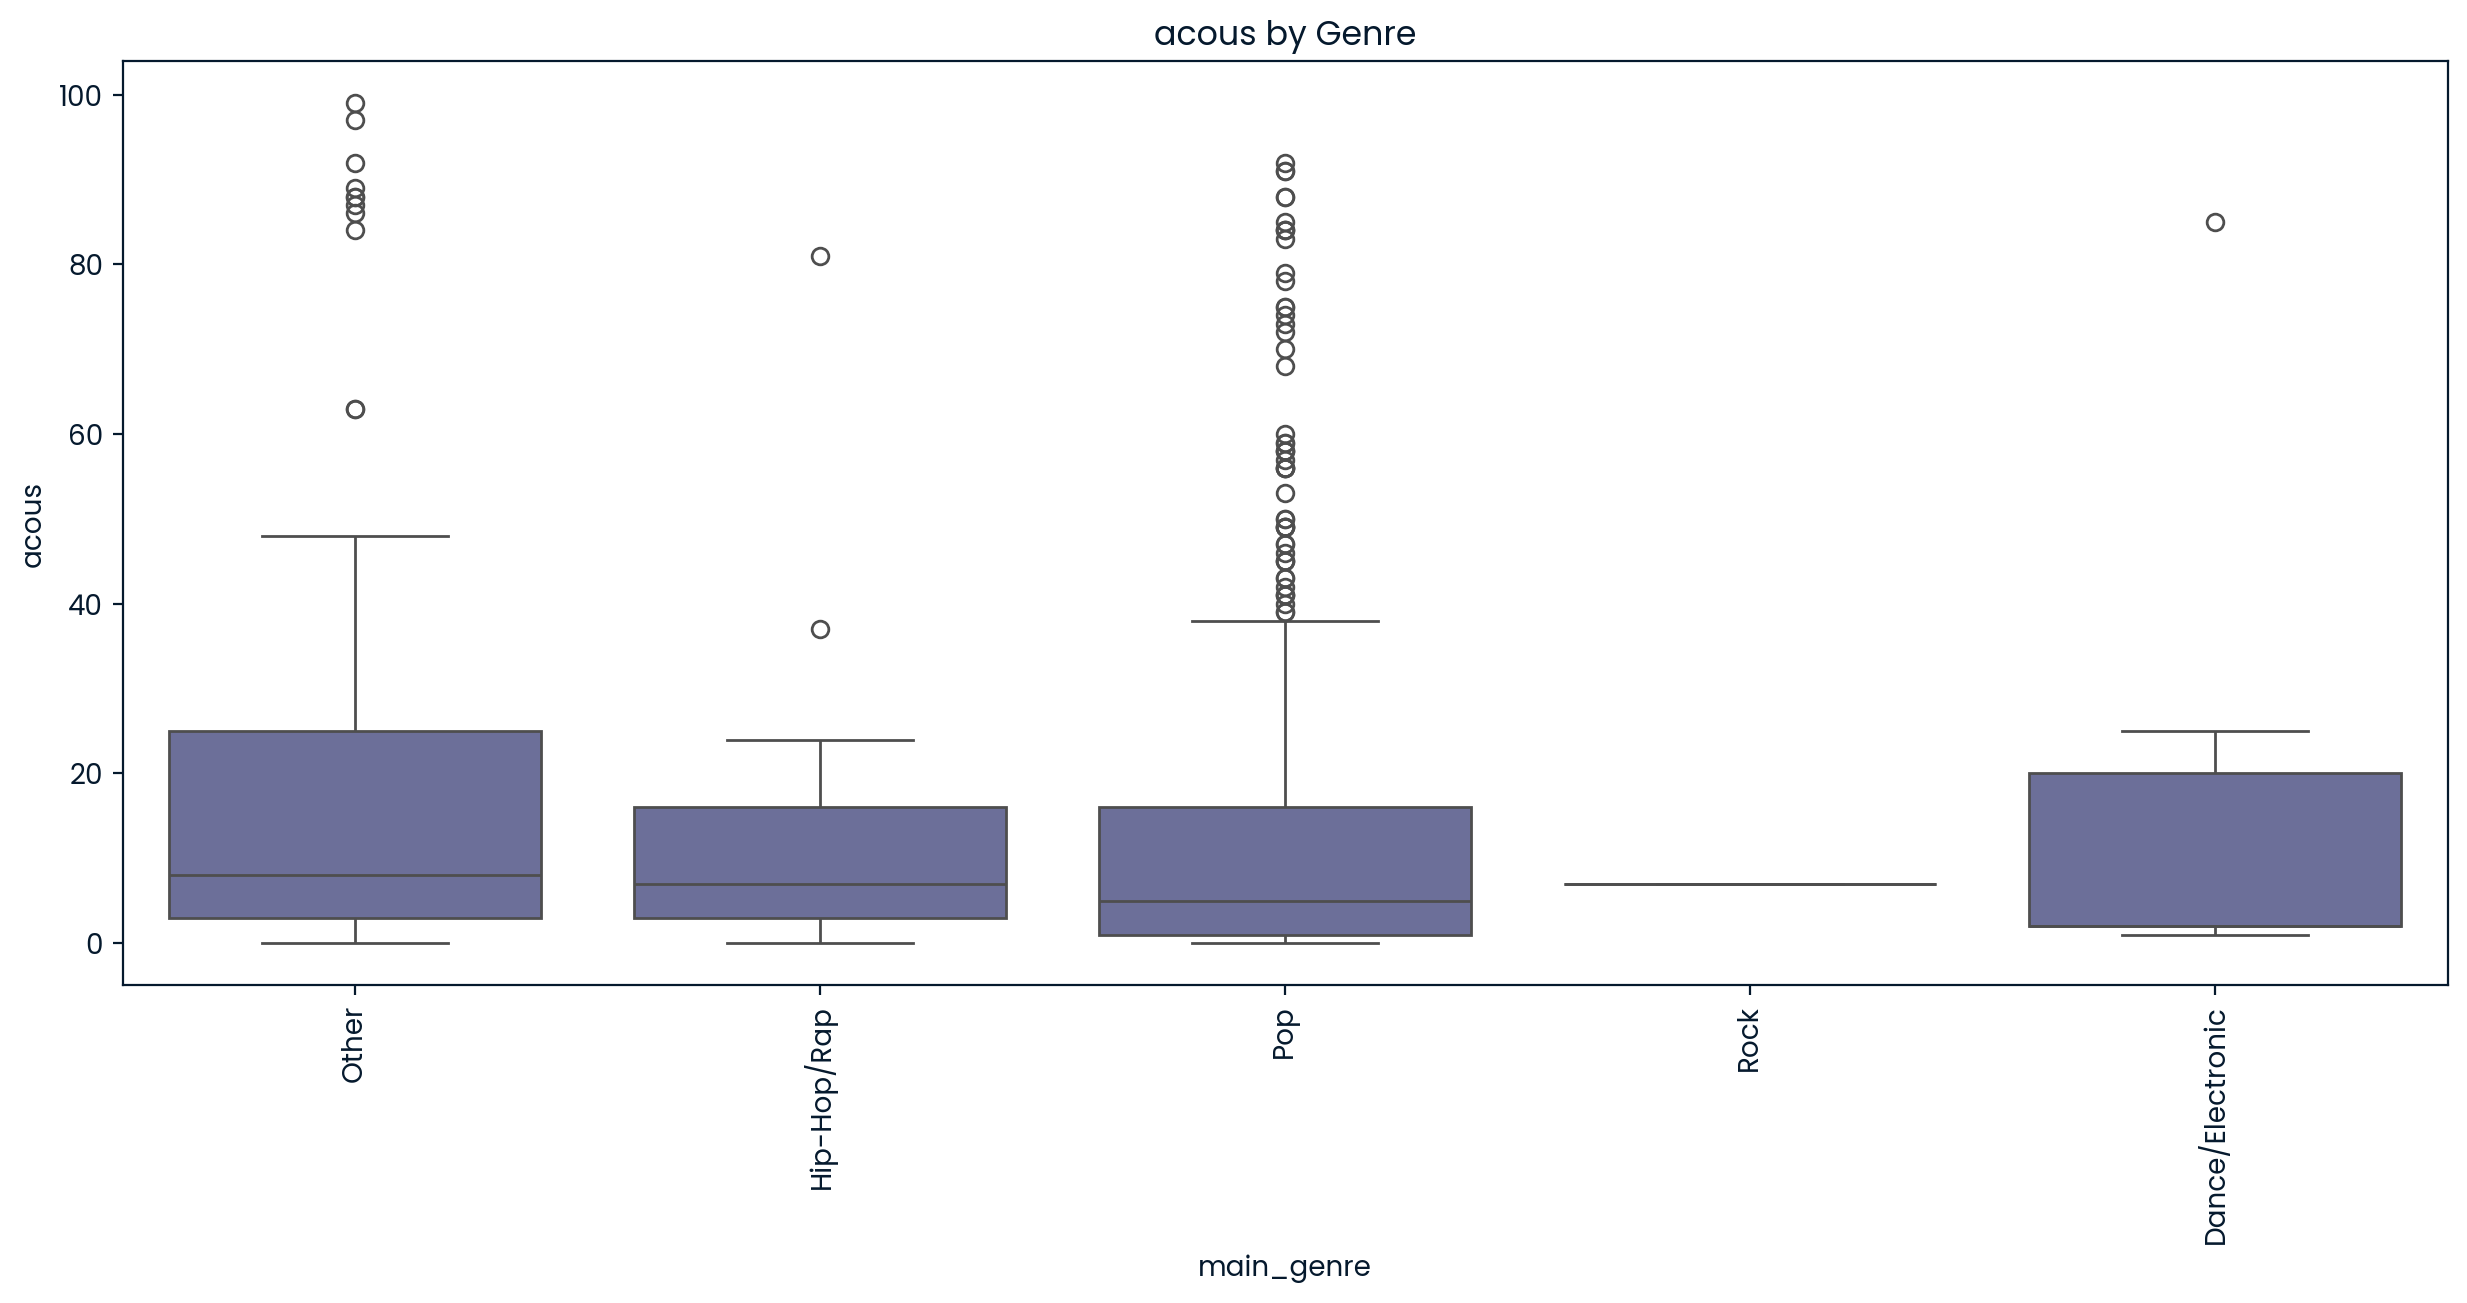

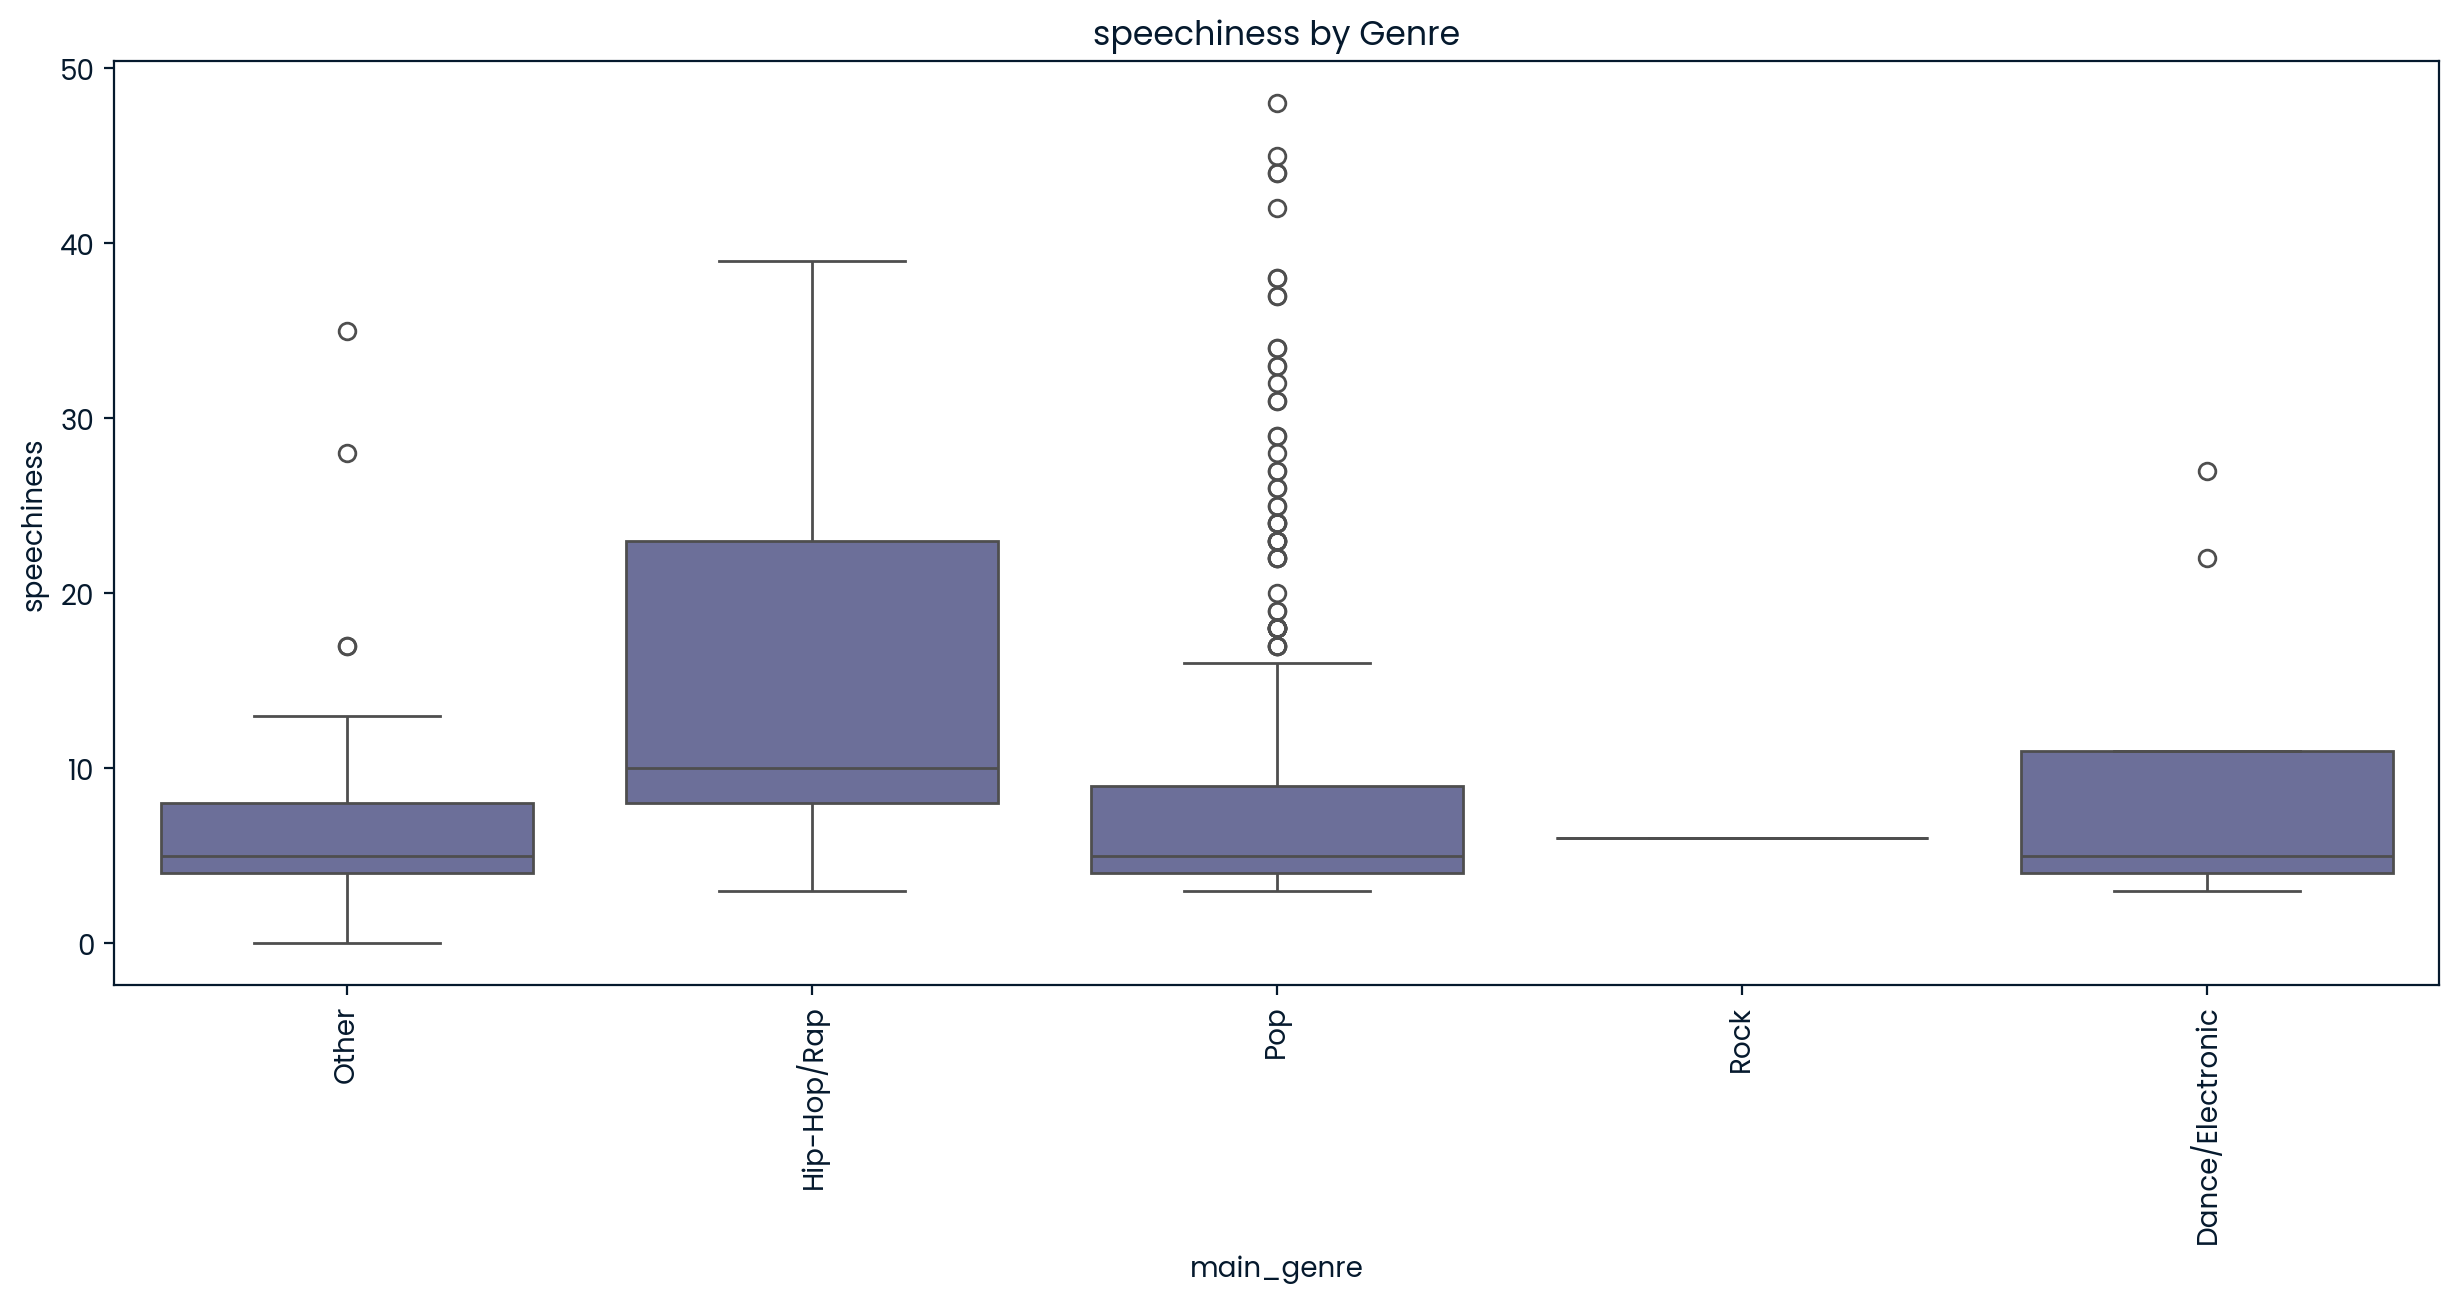

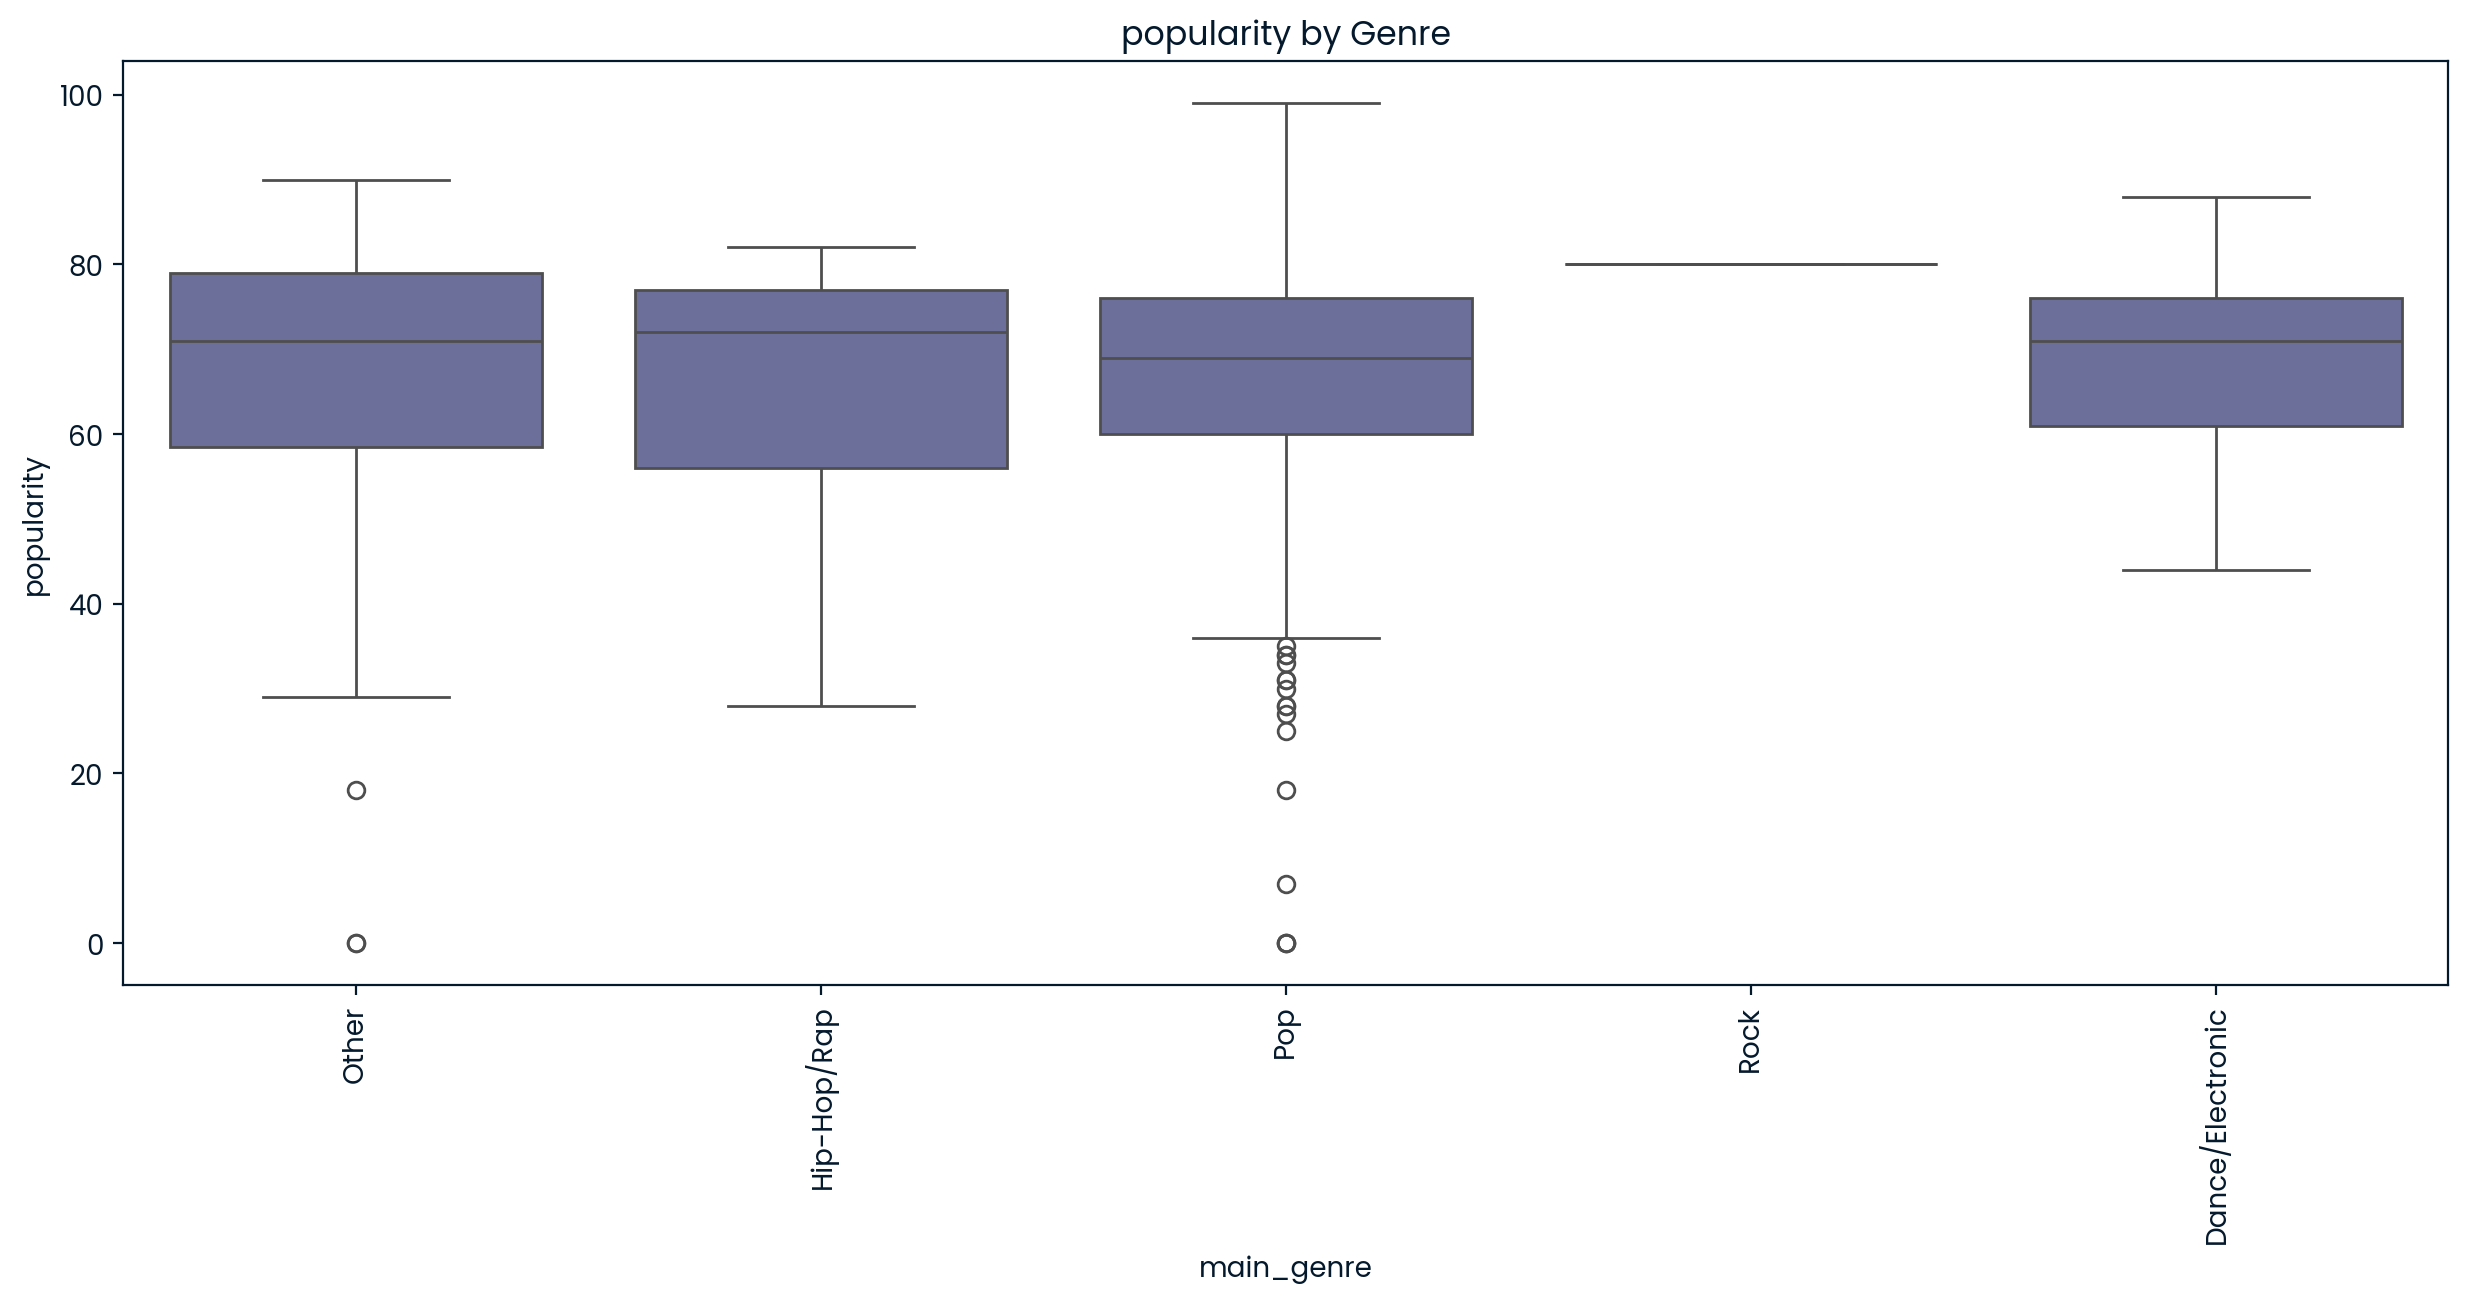

In [82]:
for col in numeric_cols:
    plt.figure(figsize=(15,6))
    sns.boxplot(x='main_genre',y=col,data=spotify)
    plt.xticks(rotation=90)
    plt.title(f"{col} by Genre")
    plt.show()

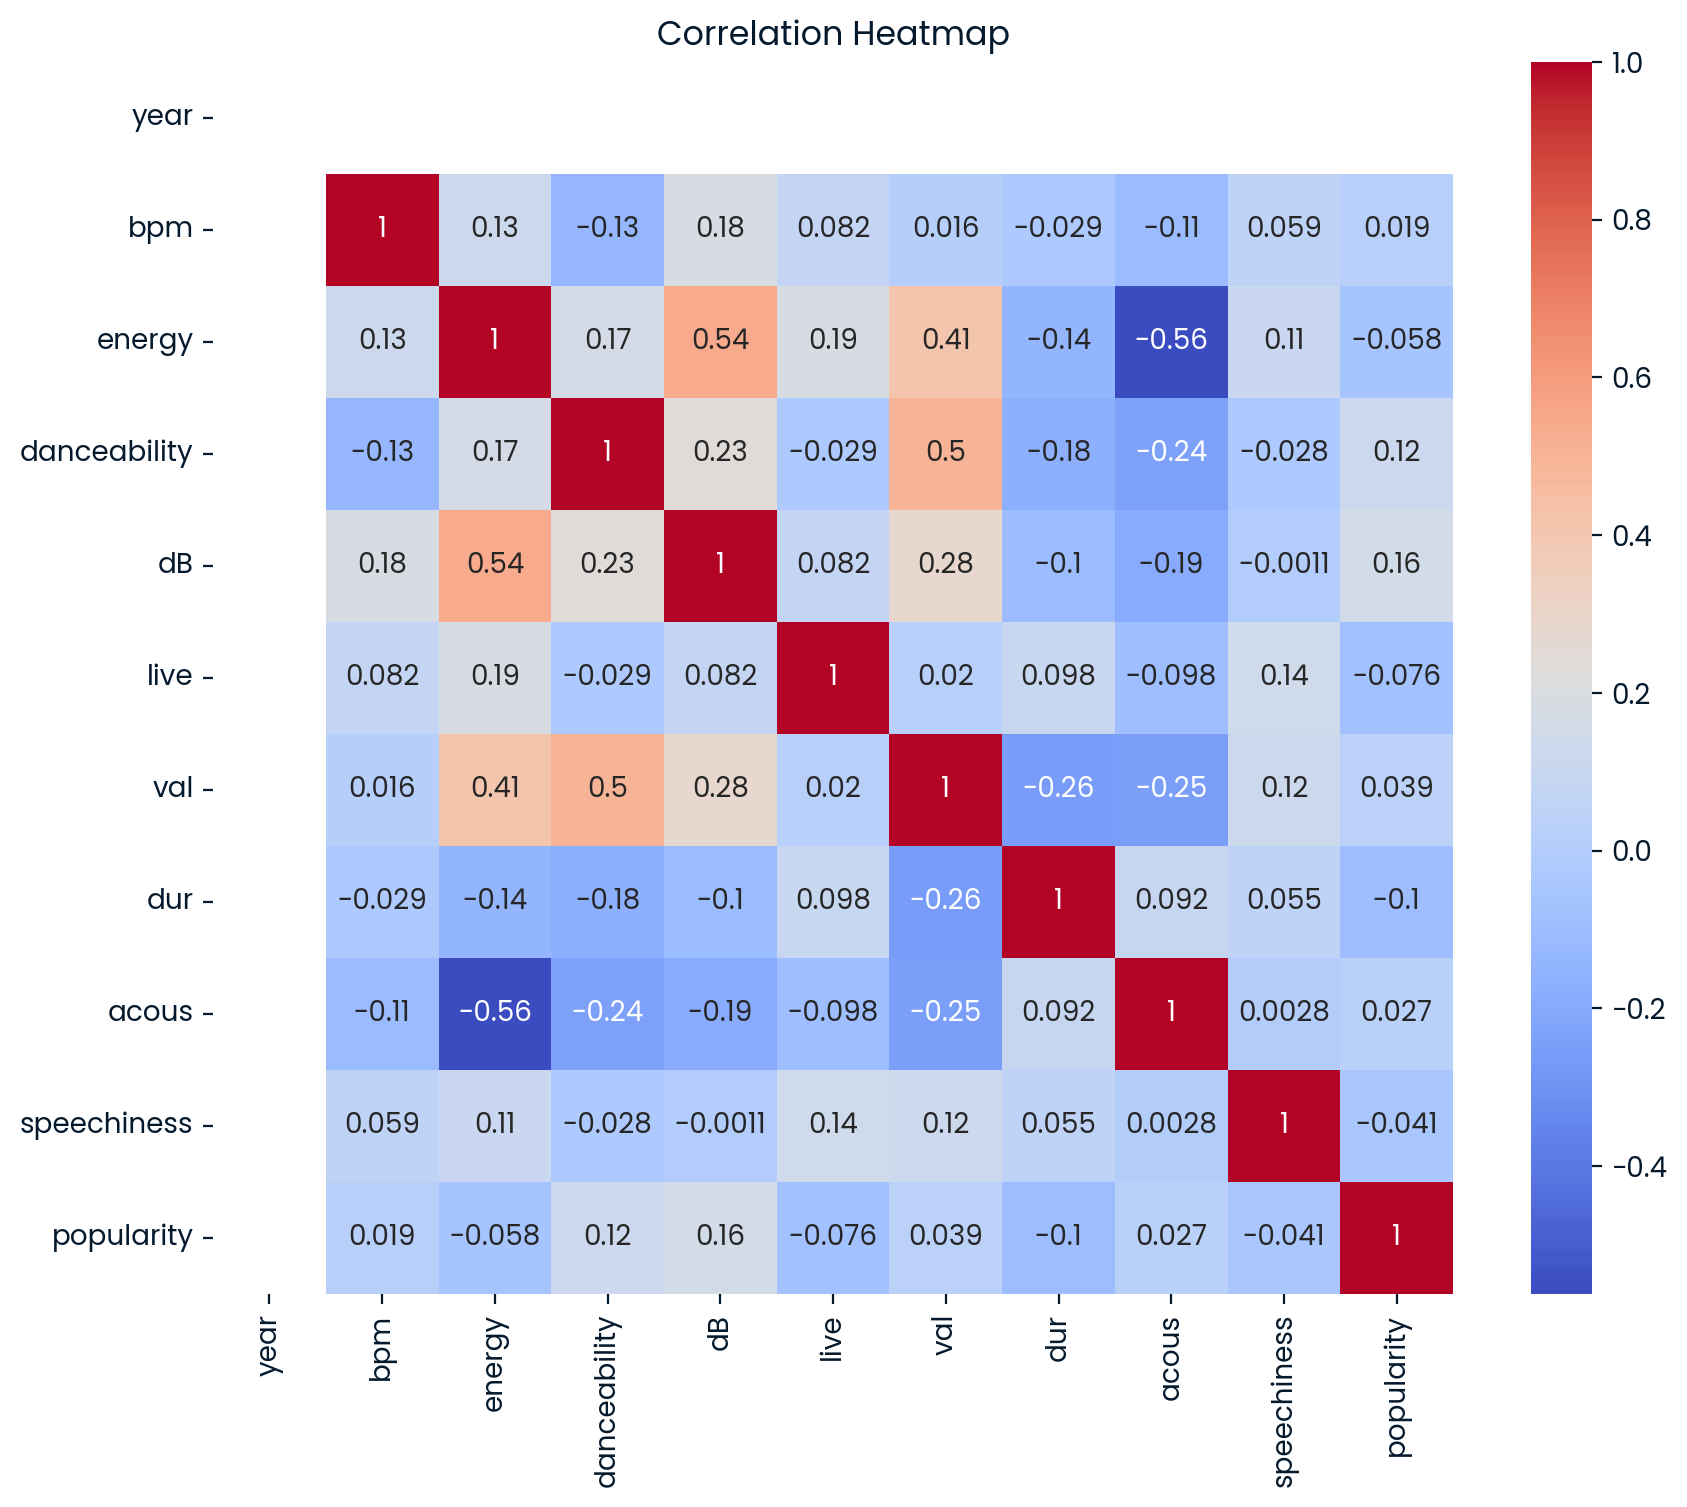

In [83]:
plt.figure(figsize=(10,8))
sns.heatmap(spotify[numeric_cols].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

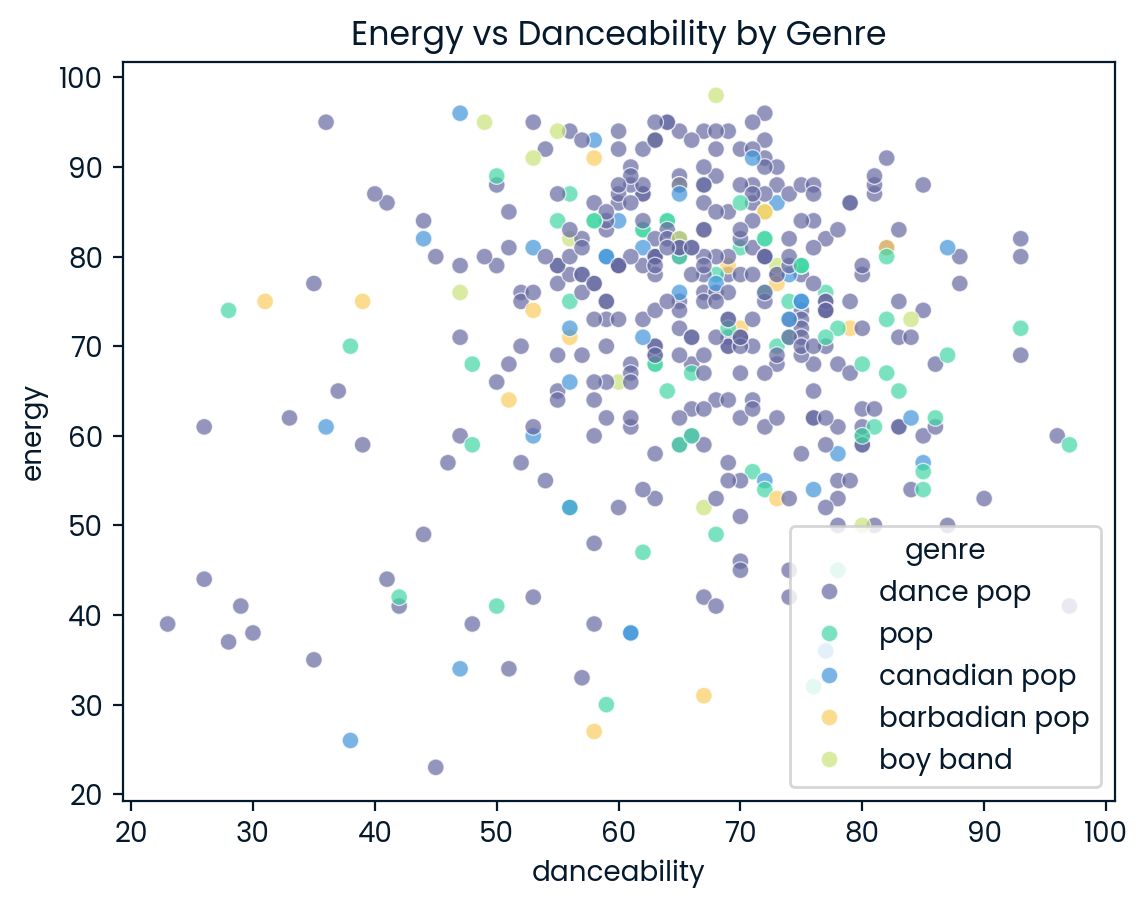

In [35]:
top_genres = df['genre'].value_counts().head(5).index
df_top = df[df['genre'].isin(top_genres)]
sns.scatterplot(x='danceability',y='energy',hue='genre',data=df_top,alpha=0.7)
plt.title('Energy vs Danceability by Genre')
plt.show()

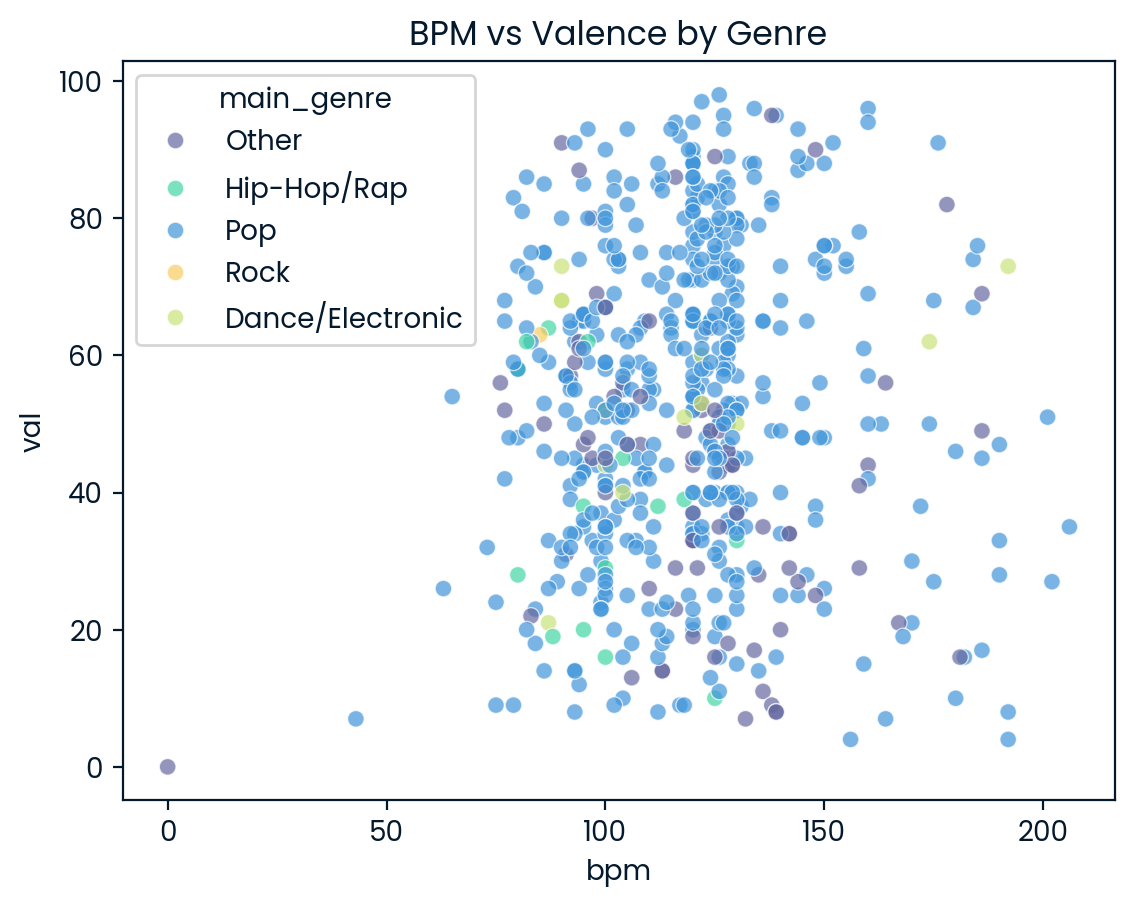

In [84]:
import seaborn as sns
sns.scatterplot(x='bpm',y='val',hue='main_genre',data=spotify,alpha=0.7)
plt.title('BPM vs Valence by Genre')
plt.show()

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier


# Filter out classes with less than 2 instances
class_counts = spotify['main_genre'].value_counts()
valid_classes = class_counts[class_counts >= 2].index
filtered_spotify = spotify[spotify['main_genre'].isin(valid_classes)]

features = ['year','bpm','energy','danceability','dB','live','val','dur','acous','speechiness','popularity']
X = filtered_spotify[features]
y = filtered_spotify['main_genre']  # categorical target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        class_weight='balanced'
    ))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Logistic Regression:", round(accuracy, 4))
print(classification_report(y_test, y_pred))

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("RF Accuracy for Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy for Logistic Regression: 0.4298
                  precision    recall  f1-score   support

Dance/Electronic       0.00      0.00      0.00         3
     Hip-Hop/Rap       0.12      0.33      0.18         3
           Other       0.10      0.17      0.12        18
             Pop       0.76      0.49      0.60        97

        accuracy                           0.43       121
       macro avg       0.25      0.25      0.23       121
    weighted avg       0.63      0.43      0.50       121

RF Accuracy for Random Forest: 0.8016528925619835
                  precision    recall  f1-score   support

Dance/Electronic       0.00      0.00      0.00         3
     Hip-Hop/Rap       0.00      0.00      0.00         3
           Other       0.50      0.11      0.18        18
             Pop       0.81      0.98      0.89        97

        accuracy                           0.80       121
       macro avg       0.33      0.27      0.27       121
    weighted avg       0.73      0

In [90]:
import pandas as pd

# Function to take user input and predict
def predict_from_input():
    print("Enter song details to predict genre 🎵")

    year = int(input("Year: "))
    bpm = float(input("BPM (tempo): "))
    energy = float(input("Energy (0–100): "))
    danceability = float(input("Danceability (0–100): "))
    dB = float(input("Loudness in dB (negative values, e.g. -5): "))
    live = float(input("Liveness: "))
    val = float(input("Valence (0–100): "))
    dur = float(input("Duration (seconds): "))
    acous = float(input("Acousticness: "))
    speechiness = float(input("Speechiness: "))
    popularity = float(input("Popularity (0–100): "))

    # Prepare input in same format as training data
    input_data = pd.DataFrame([{
        'year': year,
        'bpm': bpm,
        'energy': energy,
        'danceability': danceability,
        'dB': dB,
        'live': live,
        'val': val,
        'dur': dur,
        'acous': acous,
        'speechiness': speechiness,
        'popularity': popularity
    }])

    # Predict with your trained Random Forest model
    prediction = rf.predict(input_data)[0]
    print("\n🎶 Predicted Genre:", prediction)

predict_from_input()


Enter song details to predict genre 🎵
Year: 2010
BPM (tempo): 87
Energy (0–100): 99
Danceability (0–100): 100
Loudness in dB (negative values, e.g. -5): 3
Liveness: 23
Valence (0–100): 87
Duration (seconds): 38
Acousticness: 64
Speechiness: 33
Popularity (0–100): 100

🎶 Predicted Genre: Pop
